***
# __Project Name__

## _Exploratory Data Analysis of Global Power Plant Database._

***
# __Project Overview__

[__The Global Power Plant Database__](https://datasets.wri.org/dataset/globalpowerplantdatabase) is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35000 power plants from 167 countries, representing about 72% of the world's capacity and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.

In this project- in depth analysis of the Global Power Plant dataset will be performed. At first, data cleaning & preprocessing steps (such as Null Value Imputation, Dealing with Outliers, Feature Selection etc.) will be performed. Then, we will enter into the Analysis phase. Different vital information about global power generation will be extracted. Also, data will be separated and analyzed based on renewable and nonrenewable type of fuels. Statistical Analysis of the features will be performed. Finally, the findings will be listed and future scope of work will be stated. 

Through this project, a clear picture of the Global Power Sector will be come into sight. This project will make the monitoring process of global power generation condition effective and easier. This will ultimately assist in better decision making and thus improving the performance of global power sector. 

***

# __Project Completion Steps__

1. [Importing Necessary Libraries](#importing-libraries)
1. [Importing Data](#importing-data)
1. [Inspecting Dataset](#inspecting-dataset) 
1. [Feature Selection](#feature-selection)
1. [Dealing with Missing Data](#dealing-missing-data) 
1. [Inspecting Outliers](#inspecting-outliers)
1. [Analyzing Categoricl & Numerical Columns](#analyzing-columns)
1. [Querying of some vital information](#Querying-information)
1. [Summarizing the data of a particular country](#data-particular-country)
1. [Findings of the Project at a glance](#findings)
1. [Future Scope of Work](#future-work)
***

<a id = "importing-libraries"></a>

# __Importing Necessary Libraries__

In [1]:
# Linear Algebra
import numpy as np   

# Data Processing
import pandas as pd   

# Data Visualization 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set_style('ticks')

# statistical Analysis 
import statistics as st

# To deal with Dates & Times 
import datetime as dt



# We will import more libraries whenever required.

<a id = "importing-data"></a>

# __Importing Dataset__

In [2]:
df = pd.read_csv("global_power_plant_database.csv", low_memory = False)

<a id = "inspecting-dataset"></a>

# __Inspecting Dataset__

### Checking Shape of dataset, i.e., Rows & Columns

In [3]:
print('(rows, columns) = ', df.shape)

(rows, columns) =  (34936, 36)


The dataset have 36 Fields and about 35000 records.

### Inspecting first 5 Records of the dataset

In [4]:
pd.set_option('max_columns', None) #Showing all Columns
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


### Checking Duplicate Records

In [5]:
df.duplicated().any()

False

There is no Duplicate Rows in our dataset.

## Overview of the fields of the dataset

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

### Observations :
1. Among the 36 fields, 17 fields contain numerical type (float64) data & rest of the 19 fields contain object type data. We'll seperate the numerical and categorical features after feature selection step. 
2. looks like a bunch of columns have huge number of missing values. Let's check this issue... 

### Inspecting the percentage of Missing Values 

In [7]:
print("Percent of Missing Values :\n", "="*25)
(df.isnull().sum()/len(df)) * 100

Percent of Missing Values :


country                            0.000000
country_long                       0.000000
name                               0.000000
gppd_idnr                          0.000000
capacity_mw                        0.000000
latitude                           0.000000
longitude                          0.000000
primary_fuel                       0.000000
other_fuel1                       94.435539
other_fuel2                       99.209984
other_fuel3                       99.736661
commissioning_year                50.060110
owner                             40.267918
source                             0.042936
url                                0.051523
geolocation_source                 1.199336
wepp_id                           53.532173
year_of_capacity_data             57.387795
generation_gwh_2013               81.632127
generation_gwh_2014               79.316464
generation_gwh_2015               76.519922
generation_gwh_2016               73.826425
generation_gwh_2017             

- In the 'other_fuel' fields, more than 90% of the records are missing.
- In the 'generation_gwh' fields, 70-80% of the records are missing.
- In the 'estimated_generation_gwh' fields, about 50% records are missing.
- In the 'owner' field, 40% of the records are null.  
- In the 'commissioning_year' field, 50% of the records are null. 
- In the 'year_of_capacity_data' field, 57% of the records are null. 
- In the 'generation_ghwh' & 'estimated_generation_gwh' fields there are also huge amount of null records. 

We'll impute the missing values, after feature selection step.

### Checking No. of Unique values of each field

In [8]:
print("No. of Unique Values :\n", "="*20)
df.nunique()

No. of Unique Values :


country                             167
country_long                        167
name                              34528
gppd_idnr                         34936
capacity_mw                        5611
latitude                          31779
longitude                         33036
primary_fuel                         15
other_fuel1                          12
other_fuel2                          11
other_fuel3                           8
commissioning_year                 2023
owner                             10144
source                              866
url                                4870
geolocation_source                   28
wepp_id                           15263
year_of_capacity_data                11
generation_gwh_2013                5458
generation_gwh_2014                6159
generation_gwh_2015                7037
generation_gwh_2016                7671
generation_gwh_2017                7974
generation_gwh_2018                7946
generation_gwh_2019                8327


### Observations : 
- This Dataset contains the data of 34528 power plants of 167 countries across the world.
- The power plants operate by 15 different primary fuels. 

<a id = "feature-selection"></a>

# __Feature Selection__

## Dropping the Fields which are not necessary for our study :

- __'country'__ column represents the short names of the countries & __'Country_long'__ column represents the full name of the countries. So, we don't require __'country'__ column. 
- In __other fuel__ columns, more than 90% of the data are missing. We'll drop these fields.
- We'll also drop the capacity data collection year (__'year_of_capacity_data'__)
- __'gppd_idnr'__, __'wepp_id'__ & __'estimated_generation_note'__ fields are not necessary for our current study.
- Also, we don't require the data sources or the links (__'url'__).

So, lets drop the above mentioned fields from the dataset. 

In [9]:
df.drop(['country', 'other_fuel1', 'other_fuel2', 'year_of_capacity_data', 'other_fuel3', 
         'gppd_idnr', 'source', 'url', 'geolocation_source', 'wepp_id', 'generation_data_source',
         'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 
         'estimated_generation_note_2016', 'estimated_generation_note_2017'], axis = 1, inplace = True)

## Creating New Columns 
We can get name of the location of the plants from the first part of the plant name.

In [10]:
df['plant_location'] = df['name'].str.split(' ').str.get(0)

## Renaming Columns

In [11]:
df.rename(columns = {"country_long" : "country_name", "name" : "plant_name"}, inplace = True)

## Reindexing Columns

In [12]:
df = df.reindex(['country_name', 'plant_name', 'plant_location', 'primary_fuel', 'owner', 
                 'capacity_mw', 'commissioning_year', 'latitude', 'longitude', 
                'generation_gwh_2013', 'estimated_generation_gwh_2013',
                 'generation_gwh_2014', 'estimated_generation_gwh_2014', 
                 'generation_gwh_2015', 'estimated_generation_gwh_2015', 
                 'generation_gwh_2016', 'estimated_generation_gwh_2016', 
                 'generation_gwh_2017', 'estimated_generation_gwh_2017',
                 'generation_gwh_2018', 'generation_gwh_2019'], axis=1)

## Dealing with __'commissioning_year'__ column

In [13]:
# Checking the datatypes of 'commissioning_year' column
df['commissioning_year'].dtypes

dtype('float64')

In [14]:
# changing data types from float to datetime
df['commissioning_year'] = pd.to_datetime(df['commissioning_year'], format = '%Y') 
df['commissioning_year'].value_counts()

2016-01-01    880
2014-01-01    823
2015-01-01    821
2017-01-01    782
2012-01-01    769
             ... 
1902-01-01      4
1904-01-01      3
1901-01-01      2
1896-01-01      1
1899-01-01      1
Name: commissioning_year, Length: 123, dtype: int64

In [15]:
# Extracting only the year from DateTime object
commissioning_year = []
for i in df['commissioning_year']:
    commissioning_year.append(i.year)
    
df['commissioning_year'] = pd.DataFrame(commissioning_year)
df['commissioning_year'].value_counts()

2016.0    880
2014.0    823
2015.0    821
2017.0    782
2012.0    769
         ... 
1902.0      4
1904.0      3
1901.0      2
1896.0      1
1899.0      1
Name: commissioning_year, Length: 123, dtype: int64

### List of columns of the updated dataframe

In [16]:
columns = df.columns.tolist()
columns

['country_name',
 'plant_name',
 'plant_location',
 'primary_fuel',
 'owner',
 'capacity_mw',
 'commissioning_year',
 'latitude',
 'longitude',
 'generation_gwh_2013',
 'estimated_generation_gwh_2013',
 'generation_gwh_2014',
 'estimated_generation_gwh_2014',
 'generation_gwh_2015',
 'estimated_generation_gwh_2015',
 'generation_gwh_2016',
 'estimated_generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019']

<a id = "dealing-missing-data"></a>

# __Delaing with Missing Data__

Lets inspect and impute the missing records of each column of the updated dataframe. 

### Inspecting the Missing Values of each field

In [17]:
print('Missing Values (by Count):\n', '-'*25, '\n', df.isnull().sum(), '\n')
print('Missing Values (by %):\n', '-'*25, '\n', (df.isnull().sum()/len(df)) * 100)

Missing Values (by Count):
 ------------------------- 
 country_name                         0
plant_name                           0
plant_location                       0
primary_fuel                         0
owner                            14068
capacity_mw                          0
commissioning_year               17489
latitude                             0
longitude                            0
generation_gwh_2013              28519
estimated_generation_gwh_2013    18816
generation_gwh_2014              27710
estimated_generation_gwh_2014    18433
generation_gwh_2015              26733
estimated_generation_gwh_2015    17886
generation_gwh_2016              25792
estimated_generation_gwh_2016    17366
generation_gwh_2017              25436
estimated_generation_gwh_2017     1798
generation_gwh_2018              25299
generation_gwh_2019              25277
dtype: int64 

Missing Values (by %):
 ------------------------- 
 country_name                      0.000000
plant_name     

### Visualizing Missing Values

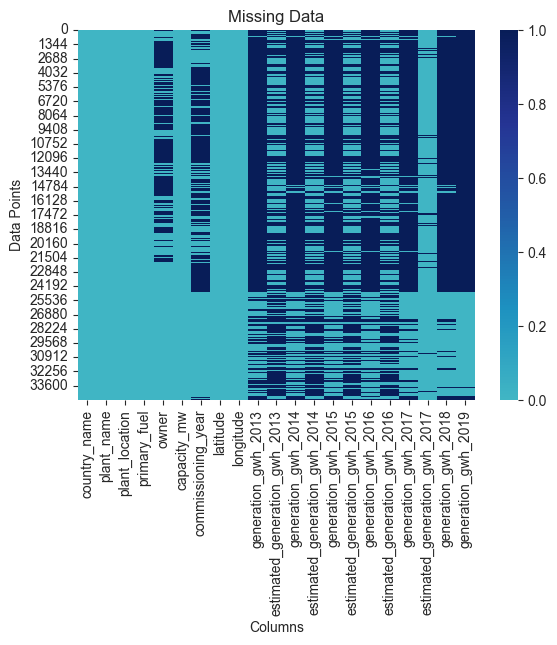

In [18]:
#Displaying Null Records

sns.heatmap(df.isnull(), cmap = "YlGnBu", center = 0).set(title = 'Missing Data', 
                                                         xlabel = 'Columns', 
                                                          ylabel = 'Data Points');

## Imputing Missing Values

### imputing Missing Values of 'owner' column
We'll impute the missing values of 'owner' column based on the __'plant_location'__ column. i.e., the owner who has the most No. of power plants in a particular location, we'll impute the missing owner records of that location, by that particular owner.  

In [19]:
from scipy.stats import mode
df['owner'] = df.groupby('plant_location')['owner'].apply(lambda x : x.fillna(mode(x).mode[0]))

# For those plant_locations, where no owner is recorded, the null values will be turned into 0 (due to mode imputation). We'll impute these values with a string 'Not_Recorded'.
df['owner'] = df['owner'].replace(0, 'Not_Recorded')

# checking whether null records in 'owner' column is still exist or not
df['owner'].isnull().sum()

0

### Imputing Missing values of 'commissioning_year' column

Lets try with __Random Sample Imputation__ technique. 

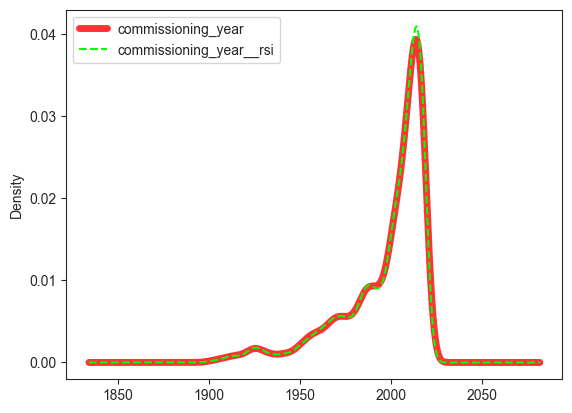

In [20]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()
df['commissioning_year__rsi'] = rsi.fit_transform(df[['commissioning_year']])

df['commissioning_year'].plot(kind = 'kde', color = 'r', linewidth = 5, alpha = .8)
df['commissioning_year__rsi'].plot(kind = 'kde', color = 'lime', linestyle = '--')
plt.legend();

From the distribution plot it's clear that, the data distribution of __'commissioning_year'__ column, before and after imputation of the null values are almost same. So, we can impute the null values of __'commissioning_year'__ column by Random Sample Imputation technique. 

In [21]:
# dropping unnecessary test columns from the dataframe
df = df.drop(['commissioning_year__rsi'], axis = 1)

# replacing the '0's
df['commissioning_year'] = rsi.fit_transform(df[['commissioning_year']])

# checking whether replacement is successful or not
df['commissioning_year'].isnull().sum()

0

### Imputing Missing values of generation columns

In [22]:
# List of generation related columns
gen_columns = [columns[i] for i in (9,11,13,15,17,19,20)]
gen_columns

['generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019']

1. We'll impute the missing values with the mean generation of respective primary fuel & corresponding owner of the plants.
1. Then, we'll try to impute the rest of the missing values with the mean generation of respective primary fuel & corresponding locations of the plants.
1. After that, we'll try to impute the rest of the null values, with the mean generation of respective primary fuel & corresponding country of the plants.
1. If still the null values will remain, we'll impute them by the value of '0'. 

In [23]:
def gen_null_impute_mean_owner(gen_column):
    df[gen_column] = df.groupby(['owner', 'primary_fuel'])[gen_column].apply(lambda x : x.fillna(x.mean()))
    print(f'Null Values of {gen_column} = ', df[gen_column].isnull().sum())
    
for i in gen_columns:
    gen_null_impute_mean_owner(i)

Null Values of generation_gwh_2013 =  22859
Null Values of generation_gwh_2014 =  20506
Null Values of generation_gwh_2015 =  18905
Null Values of generation_gwh_2016 =  13571
Null Values of generation_gwh_2017 =  17888
Null Values of generation_gwh_2018 =  20541
Null Values of generation_gwh_2019 =  25089


In [24]:
def gen_null_impute_mean_location(gen_column):
    df[gen_column] = df.groupby(['plant_location', 'primary_fuel'])[gen_column].apply(lambda x : x.fillna(x.mean()))
    print(f'Null Values of {gen_column} = ', df[gen_column].isnull().sum())
    
for i in gen_columns:
    gen_null_impute_mean_location(i)

Null Values of generation_gwh_2013 =  21573
Null Values of generation_gwh_2014 =  19176
Null Values of generation_gwh_2015 =  17388
Null Values of generation_gwh_2016 =  12183
Null Values of generation_gwh_2017 =  16569
Null Values of generation_gwh_2018 =  19549
Null Values of generation_gwh_2019 =  24166


In [25]:
def gen_null_impute_mean_country(gen_column):
    df[gen_column] = df.groupby(['country_name', 'primary_fuel'])[gen_column].apply(lambda x : x.fillna(x.mean()))
    print(f'Null Values of {gen_column} = ', df[gen_column].isnull().sum())
    
for i in gen_columns:
    gen_null_impute_mean_country(i)

Null Values of generation_gwh_2013 =  6279
Null Values of generation_gwh_2014 =  3946
Null Values of generation_gwh_2015 =  2602
Null Values of generation_gwh_2016 =  1592
Null Values of generation_gwh_2017 =  2130
Null Values of generation_gwh_2018 =  5282
Null Values of generation_gwh_2019 =  7260


In [26]:
def gen_null_impute_zero(gen_column):
    df[gen_column].fillna(0, inplace = True)
    print(f'Null Values of {gen_column} = ', df[gen_column].isnull().sum())
    
for i in gen_columns:
    gen_null_impute_zero(i)

Null Values of generation_gwh_2013 =  0
Null Values of generation_gwh_2014 =  0
Null Values of generation_gwh_2015 =  0
Null Values of generation_gwh_2016 =  0
Null Values of generation_gwh_2017 =  0
Null Values of generation_gwh_2018 =  0
Null Values of generation_gwh_2019 =  0


So, all the null values of generation columns have successfully imputed.  

### Imputing Missing values of estimated generation columns

Here, we'll apply the similar procedure of imputing generation columns. 

In [27]:
# List of generation related columns
est_gen_columns = [columns[i] for i in (10, 12, 14, 16, 18)]
est_gen_columns

['estimated_generation_gwh_2013',
 'estimated_generation_gwh_2014',
 'estimated_generation_gwh_2015',
 'estimated_generation_gwh_2016',
 'estimated_generation_gwh_2017']

In [28]:
def est_gen_null_impute_mean_owner(est_gen_column):
    df[est_gen_column] = df.groupby(['owner', 'primary_fuel'])[est_gen_column].apply(lambda x : x.fillna(x.mean()))
    print(f'Null Values of {est_gen_column} = ', df[est_gen_column].isnull().sum())
    
for i in est_gen_columns:
    est_gen_null_impute_mean_owner(i)

Null Values of estimated_generation_gwh_2013 =  16127
Null Values of estimated_generation_gwh_2014 =  15754
Null Values of estimated_generation_gwh_2015 =  15473
Null Values of estimated_generation_gwh_2016 =  15184
Null Values of estimated_generation_gwh_2017 =  1727


In [29]:
def est_gen_null_impute_mean_location(est_gen_column):
    df[est_gen_column] = df.groupby(['plant_location', 'primary_fuel'])[est_gen_column].apply(lambda x : x.fillna(x.mean()))
    print(f'Null Values of {est_gen_column} = ', df[est_gen_column].isnull().sum())
    
for i in est_gen_columns:
    est_gen_null_impute_mean_location(i)

Null Values of estimated_generation_gwh_2013 =  15274
Null Values of estimated_generation_gwh_2014 =  14952
Null Values of estimated_generation_gwh_2015 =  14732
Null Values of estimated_generation_gwh_2016 =  14476
Null Values of estimated_generation_gwh_2017 =  1722


In [30]:
def est_gen_null_impute_mean_country(est_gen_column):
    df[est_gen_column] = df.groupby(['country_name', 'primary_fuel'])[est_gen_column].apply(lambda x : x.fillna(x.mean()))
    print(f'Null Values of {est_gen_column} = ', df[est_gen_column].isnull().sum())
    
for i in est_gen_columns:
    est_gen_null_impute_mean_country(i)

Null Values of estimated_generation_gwh_2013 =  11805
Null Values of estimated_generation_gwh_2014 =  11804
Null Values of estimated_generation_gwh_2015 =  11801
Null Values of estimated_generation_gwh_2016 =  11800
Null Values of estimated_generation_gwh_2017 =  1710


In [31]:
def est_gen_null_impute_zero(est_gen_column):
    df[est_gen_column].fillna(0, inplace = True)
    print(f'Null Values of {est_gen_column} = ', df[est_gen_column].isnull().sum())
    
for i in est_gen_columns:
    est_gen_null_impute_zero(i)

Null Values of estimated_generation_gwh_2013 =  0
Null Values of estimated_generation_gwh_2014 =  0
Null Values of estimated_generation_gwh_2015 =  0
Null Values of estimated_generation_gwh_2016 =  0
Null Values of estimated_generation_gwh_2017 =  0


Thus, null values of estimated generation column have successfully imputed. Lets chek whether all the null values of the dataframe have imputed or not : 

In [32]:
df.isnull().sum()

country_name                     0
plant_name                       0
plant_location                   0
primary_fuel                     0
owner                            0
capacity_mw                      0
commissioning_year               0
latitude                         0
longitude                        0
generation_gwh_2013              0
estimated_generation_gwh_2013    0
generation_gwh_2014              0
estimated_generation_gwh_2014    0
generation_gwh_2015              0
estimated_generation_gwh_2015    0
generation_gwh_2016              0
estimated_generation_gwh_2016    0
generation_gwh_2017              0
estimated_generation_gwh_2017    0
generation_gwh_2018              0
generation_gwh_2019              0
dtype: int64

So, all the null values of the dataframe have imputed successfully. Lets, check the sample of our final dataframe, before we starting the Analysis: 

In [33]:
df.sample(3)

,country_name,plant_name,plant_location,primary_fuel,owner,capacity_mw,commissioning_year,latitude,longitude,generation_gwh_2013,estimated_generation_gwh_2013,generation_gwh_2014,estimated_generation_gwh_2014,generation_gwh_2015,estimated_generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
30631,United States of America,Neil Simpson Gas Turbine #2,Neil,Gas,Black Hills Power Inc. d/b/a,40.0,2001.0,44.2850,-105.3786,16.577000,0.000000,4.478000,0.000000,7.027000,0.000000,5.309000,0.000000,7.678000,141.05,11.679,16.426
26769,United States of America,Covington Solar Farm,Covington,Solar,Oklahoma Gas & Electric Co,10.0,2018.0,36.3179,-97.5859,9.436001,19.511393,12.591438,19.604846,15.304795,19.170883,16.626971,19.117026,21.243372,16.29,21.496,21.842
24742,United States of America,500 Virginia Solar,500,Solar,500 Virginia Solar LP,1.0,2011.0,40.1392,-75.1917,9.436001,1.510000,1.129000,1.630000,1.103000,1.620000,1.238000,1.440000,1.174000,1.28,1.108,1.029


<a id = "analyzing-columns"></a>

# __Exploration of Columns__

### Seperating __Categorical__ & __Numerical__ columns

In [34]:
cat_columns = df.select_dtypes(include = 'object').columns.tolist()

print('Total No. of Categorical Columns = ', len(cat_columns), '\n')
print(cat_columns)

Total No. of Categorical Columns =  5 

['country_name', 'plant_name', 'plant_location', 'primary_fuel', 'owner']


In [35]:
num_columns = df.select_dtypes(include = np.number).columns.tolist()

print('Total No. of Numerical Columns = ', len(num_columns), '\n')
print(num_columns)

Total No. of Numerical Columns =  16 

['capacity_mw', 'commissioning_year', 'latitude', 'longitude', 'generation_gwh_2013', 'estimated_generation_gwh_2013', 'generation_gwh_2014', 'estimated_generation_gwh_2014', 'generation_gwh_2015', 'estimated_generation_gwh_2015', 'generation_gwh_2016', 'estimated_generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']


## Top 10 most frequent records of each categorical features

In [36]:
for i in cat_columns:
    value = df[i].value_counts().head(10)
    print('\n\n', i, '\n', '-----------', '\n', value)



 country_name 
 ----------- 
 United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Name: country_name, dtype: int64


 plant_name 
 ----------- 
 Santo Antônio    6
São José         5
Santa Helena     5
Santa Rosa       5
Funil            5
Buriti           4
Santa Maria      4
São Domingos     4
Salto            4
São Pedro        4
Name: plant_name, dtype: int64


 plant_location 
 ----------- 
 Huaneng    139
La         134
P.E.       127
PARQUE     115
Santa      108
Sichuan    106
West        98
Land        98
Yunnan      93
North       82
Name: plant_location, dtype: int64


 primary_fuel 
 ----------- 
 Solar         10665
Hydro          7156
Wind           5344
Gas            3998
Coal           2330
Oil

__Observations:__

1. USA, China & UK has the most No. of plants. 
1. Solar, Hydro & Wind run the most No. of plants. 
1. Huaneng province of China has the most No. of active power plants.

## Descriptive Statistics of Categorical Columns

In [37]:
df.describe(include = 'object').T

,count,unique,top,freq
country_name,34936,167,United States of America,9833
plant_name,34936,34528,Santo Antônio,6
plant_location,34936,21136,Huaneng,139
primary_fuel,34936,15,Solar,10665
owner,34936,10145,Not_Recorded,11538


- About 35000 power plants are spreaded among the 167 countries and 21000 different locations. USA own the most No. of power plants of almost 10,000. 
- Solar based power plants are highest in qty. It is expected as solar plants has low generation capacity. To balance this issue, solar plants have to of high in numbers and covering a larger amount of area. 
- Among 35,000 , almost 11500 owner data was not recorded. There are 10,000 owner who own the rest of the 24,000 power plants. 

## Descriptive Statistics of Numerical Columns

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,34936.0,163.355148,489.636072,1.0000,4.900000,16.745000,75.344250,22500.0000
commissioning_year,34936.0,1997.229963,23.521651,1896.0000,1988.000000,2006.000000,2014.000000,2020.0000
latitude,34936.0,32.816637,22.638603,-77.8470,29.256475,39.727750,46.263125,71.2920
longitude,34936.0,-6.972803,78.405850,-179.9777,-77.641550,-2.127100,49.502675,179.3887
generation_gwh_2013,34936.0,397.189525,1195.520386,-947.6000,2.095000,9.436001,294.814388,50834.0000
estimated_generation_gwh_2013,34936.0,129.032130,839.098805,0.0000,0.000000,10.758433,65.608581,48675.0600
generation_gwh_2014,34936.0,615.615327,1411.813276,-989.6190,2.157750,26.455500,821.600730,32320.9170
estimated_generation_gwh_2014,34936.0,131.188106,891.873331,0.0000,0.000000,10.380000,66.692500,58470.7700
generation_gwh_2015,34936.0,671.223536,1617.396019,-864.4280,4.418000,120.290650,654.394808,37433.6070
estimated_generation_gwh_2015,34936.0,130.645495,892.781520,0.0000,0.000000,9.925000,70.676351,57113.3500


- 75% of the power plants' generation capacity is below 80 MW, which indicates that, most of the 35000 plants have pretty low generation capacity. 
- Data from the year of 1896 upto the year of 2020 is available in this dataset. 
- There are some negative values in the generation columns. These cases indicate that, the power plant system is consuming more power than it generates.

## Data Distribution of Numericl Columns 

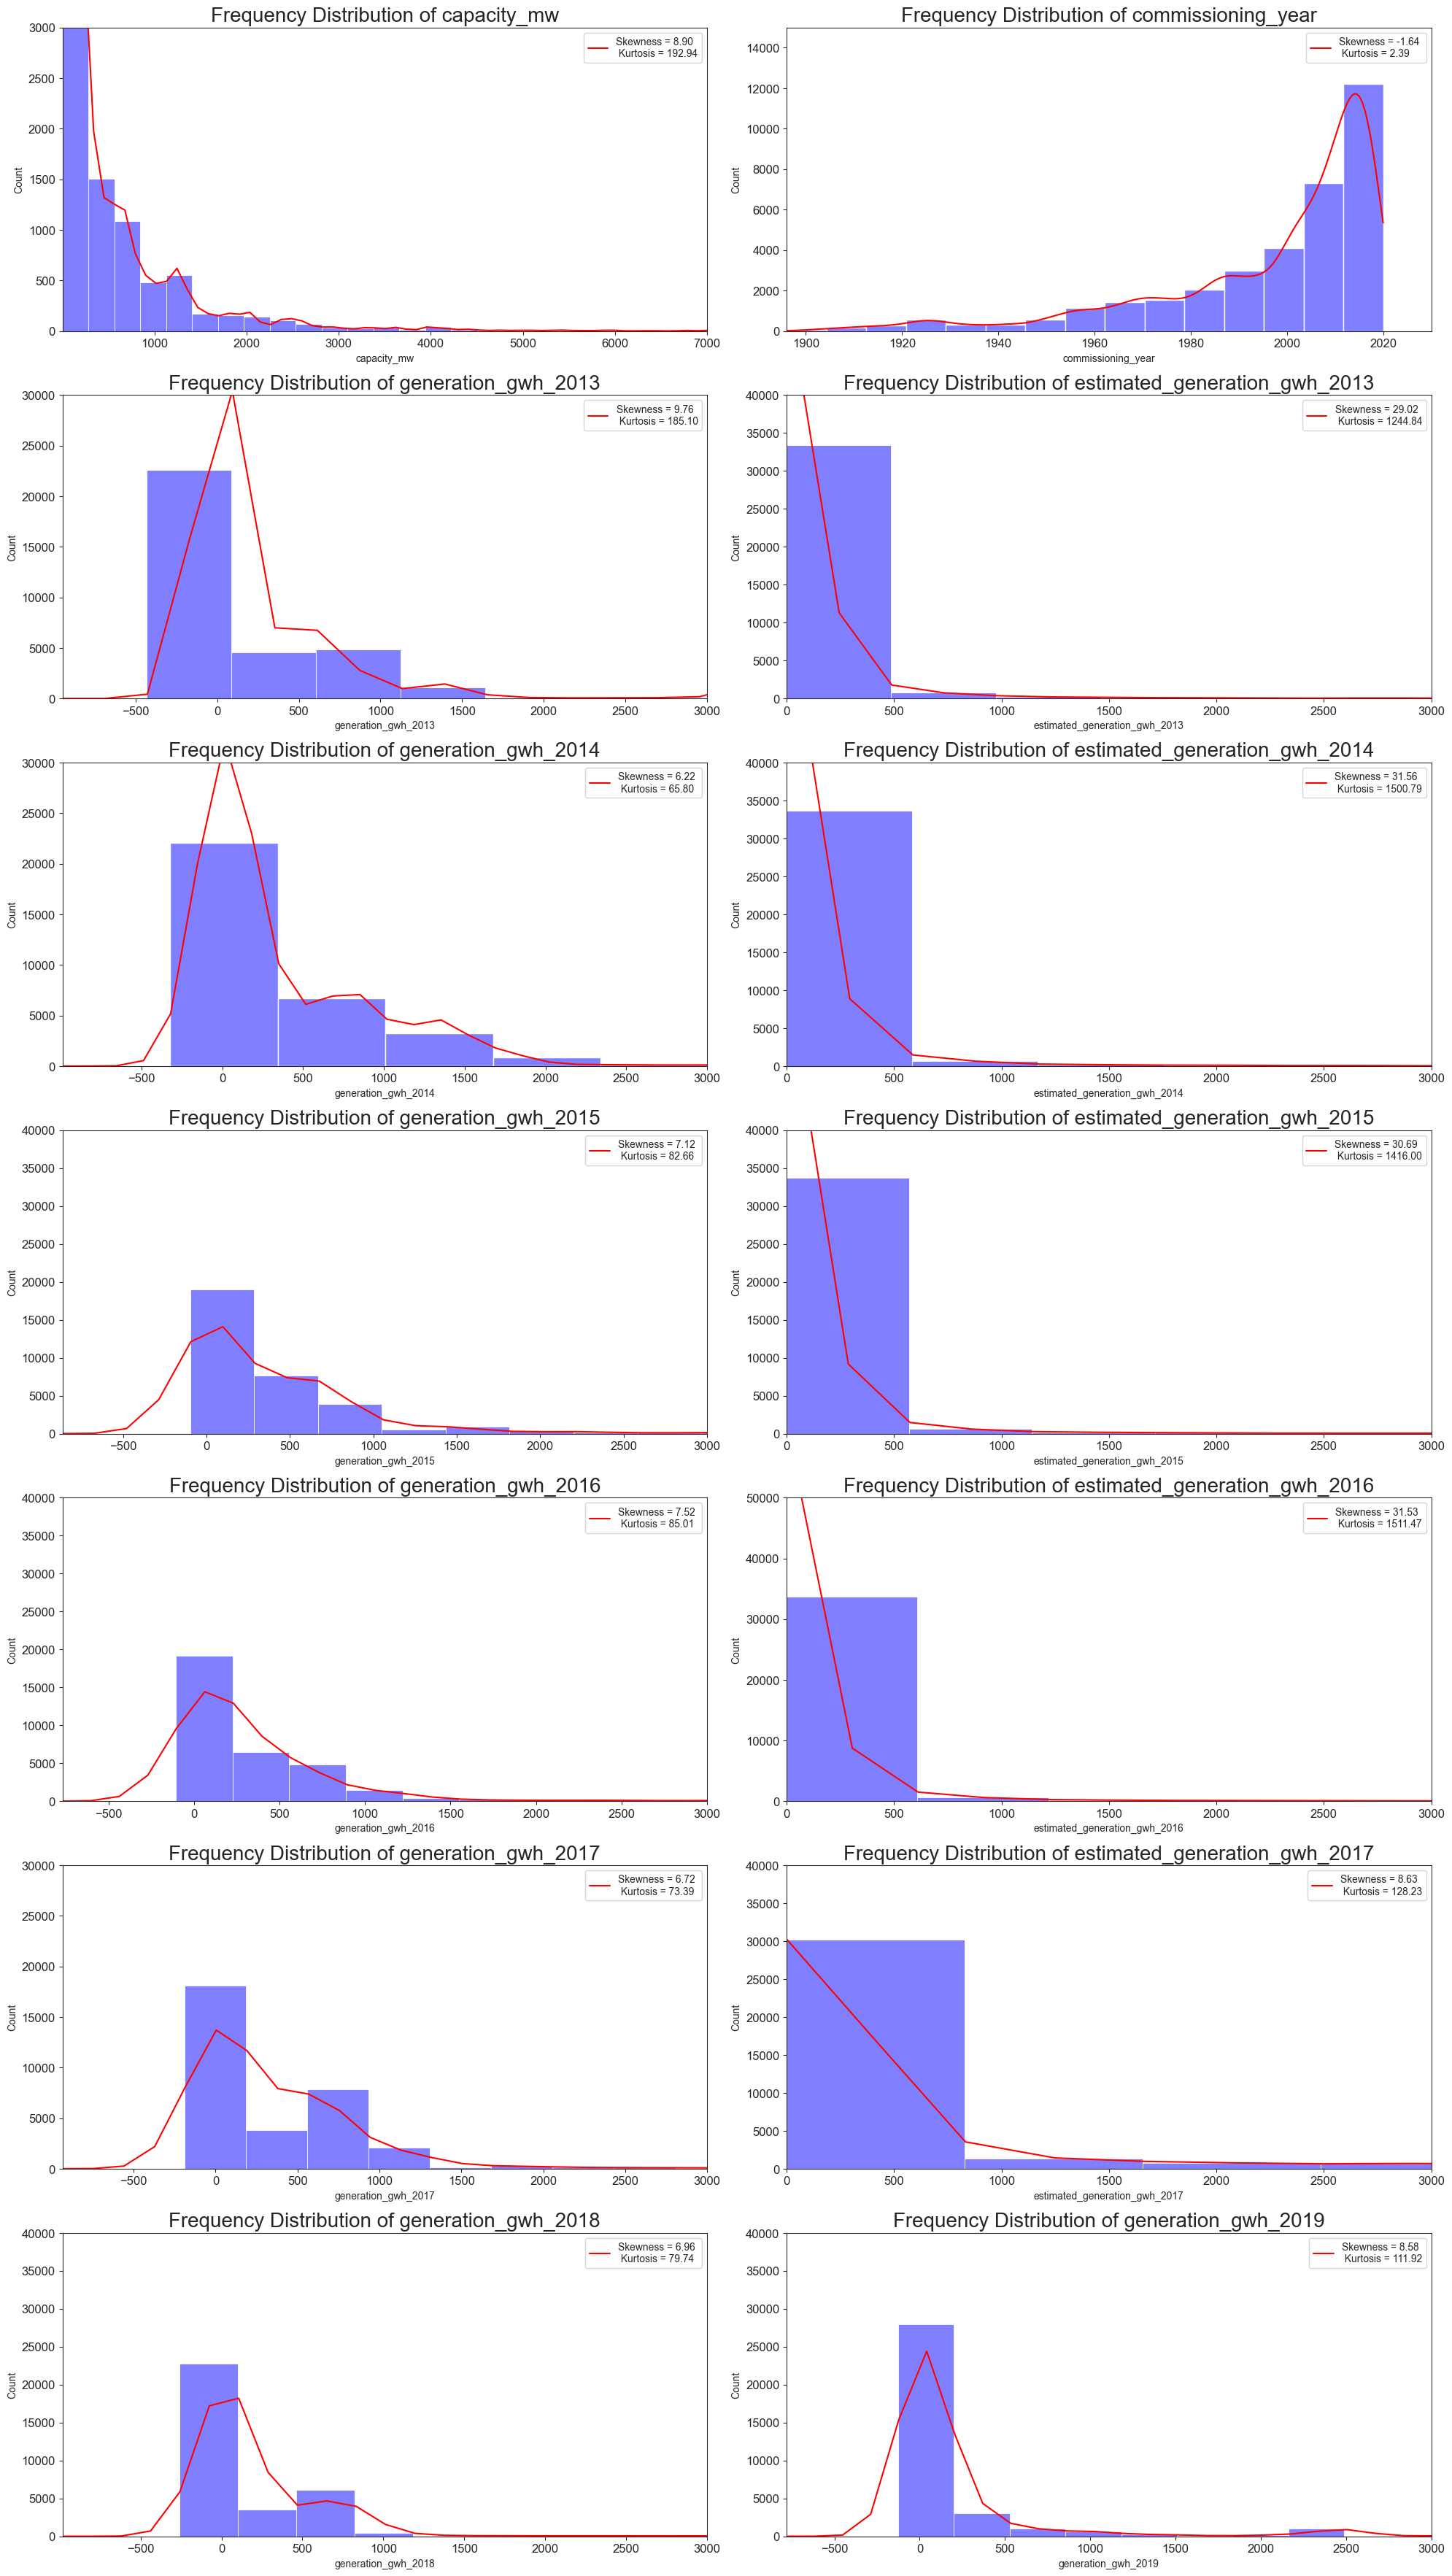

In [39]:
plt.figure(figsize = (20, 40))
def freq_dist(columns, No_of_bins, row_serial, column_serial, fig_serial, x_upper, y_upper):
    plt.subplot(row_serial, column_serial, fig_serial)
    plt.title(f'Frequency Distribution of {columns}', size = 20)
    ax = sns.histplot(df[columns], kde = True, bins = No_of_bins, color = 'b')
    ax.lines[0].set_color('r')
    x_lower = min(df[columns])
    y_lower = 0
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.legend(['Skewness = {:.2f} \n Kurtosis = {:.2f}'.format(df[columns].skew(), df[columns].kurt())], loc = 'upper right')
    plt.tight_layout()
    
columns = [i for i in num_columns if i not in ('latitude', 'longitude')]
bin_list = [80, 15, 100, 100, 50, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 100, 100]
row_list = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
column_list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
fig_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
x_upper = [7000, 2030, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000]
y_upper = [3000, 15000, 30000, 40000, 30000, 40000, 40000, 40000, 40000, 50000, 30000, 40000, 40000, 40000]

for i, j, k, p, q, r, s in zip(columns, bin_list, row_list, column_list, fig_list, x_upper, y_upper):
    freq_dist(i, j, k, p, q, r, s)

From the Frequency Distribution of __capacity__ column- most of the plants capacity is below 1000 mw.

<a id = "inspecting-outliers"></a>

# __Inspecting Outliers__

## Quantifying the number of outliers of different features

In [40]:
def find_outliers(features):
    q1 = df[features].quantile(0.25)
    q3 = df[features].quantile(0.75)
    IQR = q3-q1
    outliers = df[((df[features] < (q1-1.5*IQR)) | (df[features] > (q3+1.5*IQR)))][features]
    
    print("Feature Name : ", features, '\n')
    print("number of outliers: ", len(outliers), '\n')
    print("max outlier value: ", outliers.max(), '\n')
    print("min outlier value: ", outliers.min(), '\n')
    print("-----------------------------")
    
features = [i for i in num_columns if i not in ('commissioning_year', 'latitude', 'longitude')]
for i in features:
    find_outliers(i)

Feature Name :  capacity_mw 

number of outliers:  5622 

max outlier value:  22500.0 

min outlier value:  181.02 

-----------------------------
Feature Name :  generation_gwh_2013 

number of outliers:  3510 

max outlier value:  50834.0 

min outlier value:  -947.6 

-----------------------------
Feature Name :  estimated_generation_gwh_2013 

number of outliers:  4590 

max outlier value:  48675.06 

min outlier value:  164.06900000000002 

-----------------------------
Feature Name :  generation_gwh_2014 

number of outliers:  2094 

max outlier value:  32320.917 

min outlier value:  2051.9494000000004 

-----------------------------
Feature Name :  estimated_generation_gwh_2014 

number of outliers:  4559 

max outlier value:  58470.77 

min outlier value:  166.75 

-----------------------------
Feature Name :  generation_gwh_2015 

number of outliers:  2975 

max outlier value:  37433.607 

min outlier value:  1630.85 

-----------------------------
Feature Name :  estimated_g

## Visualizing Outliers by using box plots

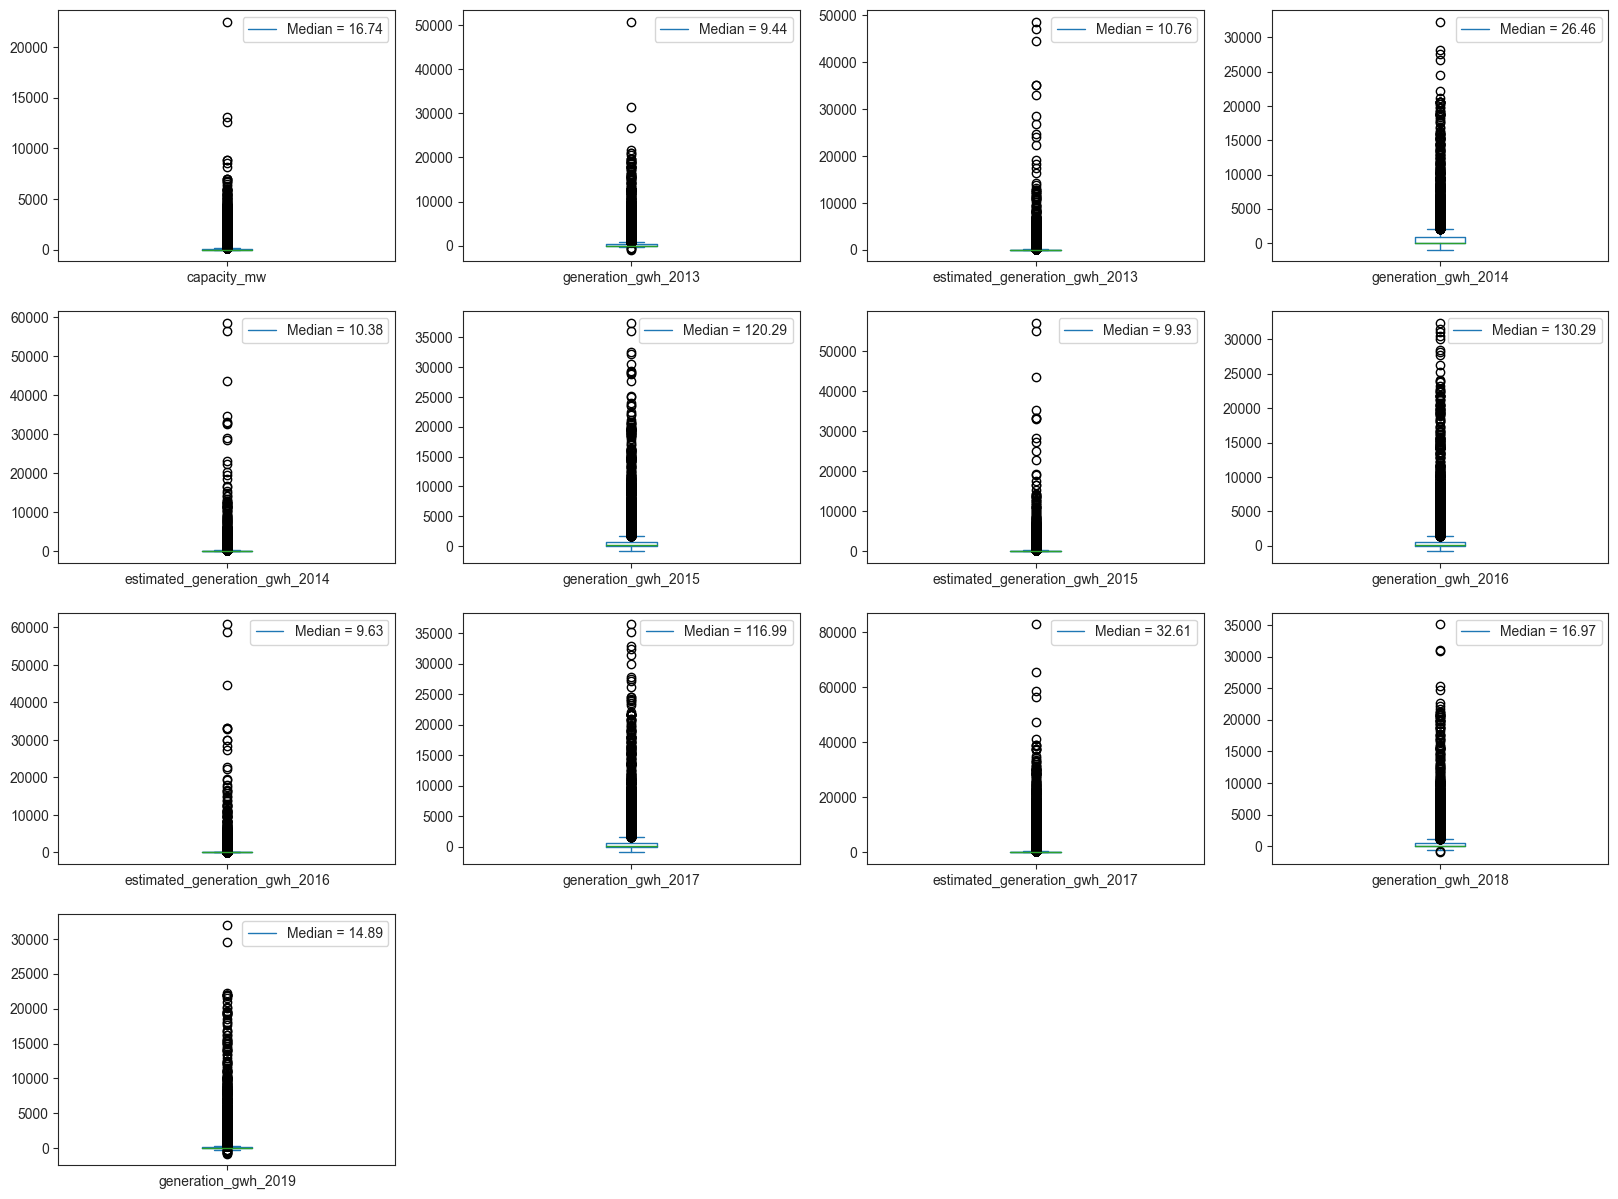

In [41]:
plt.figure(figsize = (20, 15))

def outliers(columns, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    df[columns].plot(kind = 'box')
    plt.legend(['Median = {:.2f}'.format(df[columns].median())], loc = 'best')

columns = [i for i in num_columns if i not in ('commissioning_year', 'latitude', 'longitude')]
column_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
row_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

for i, j, k, p in zip(columns, row_serial, column_serial, fig_serial):
    outliers(i, j, k, p)

Looks like a lot of outliers present in each of the numerical features. Its not abnormal at all, as these data is from diverse types of fuel and technology. Lets analyze the outliers of __capacity_mw__ column in details. 

### Outliers of __capacity_mw__ of different fuel types 

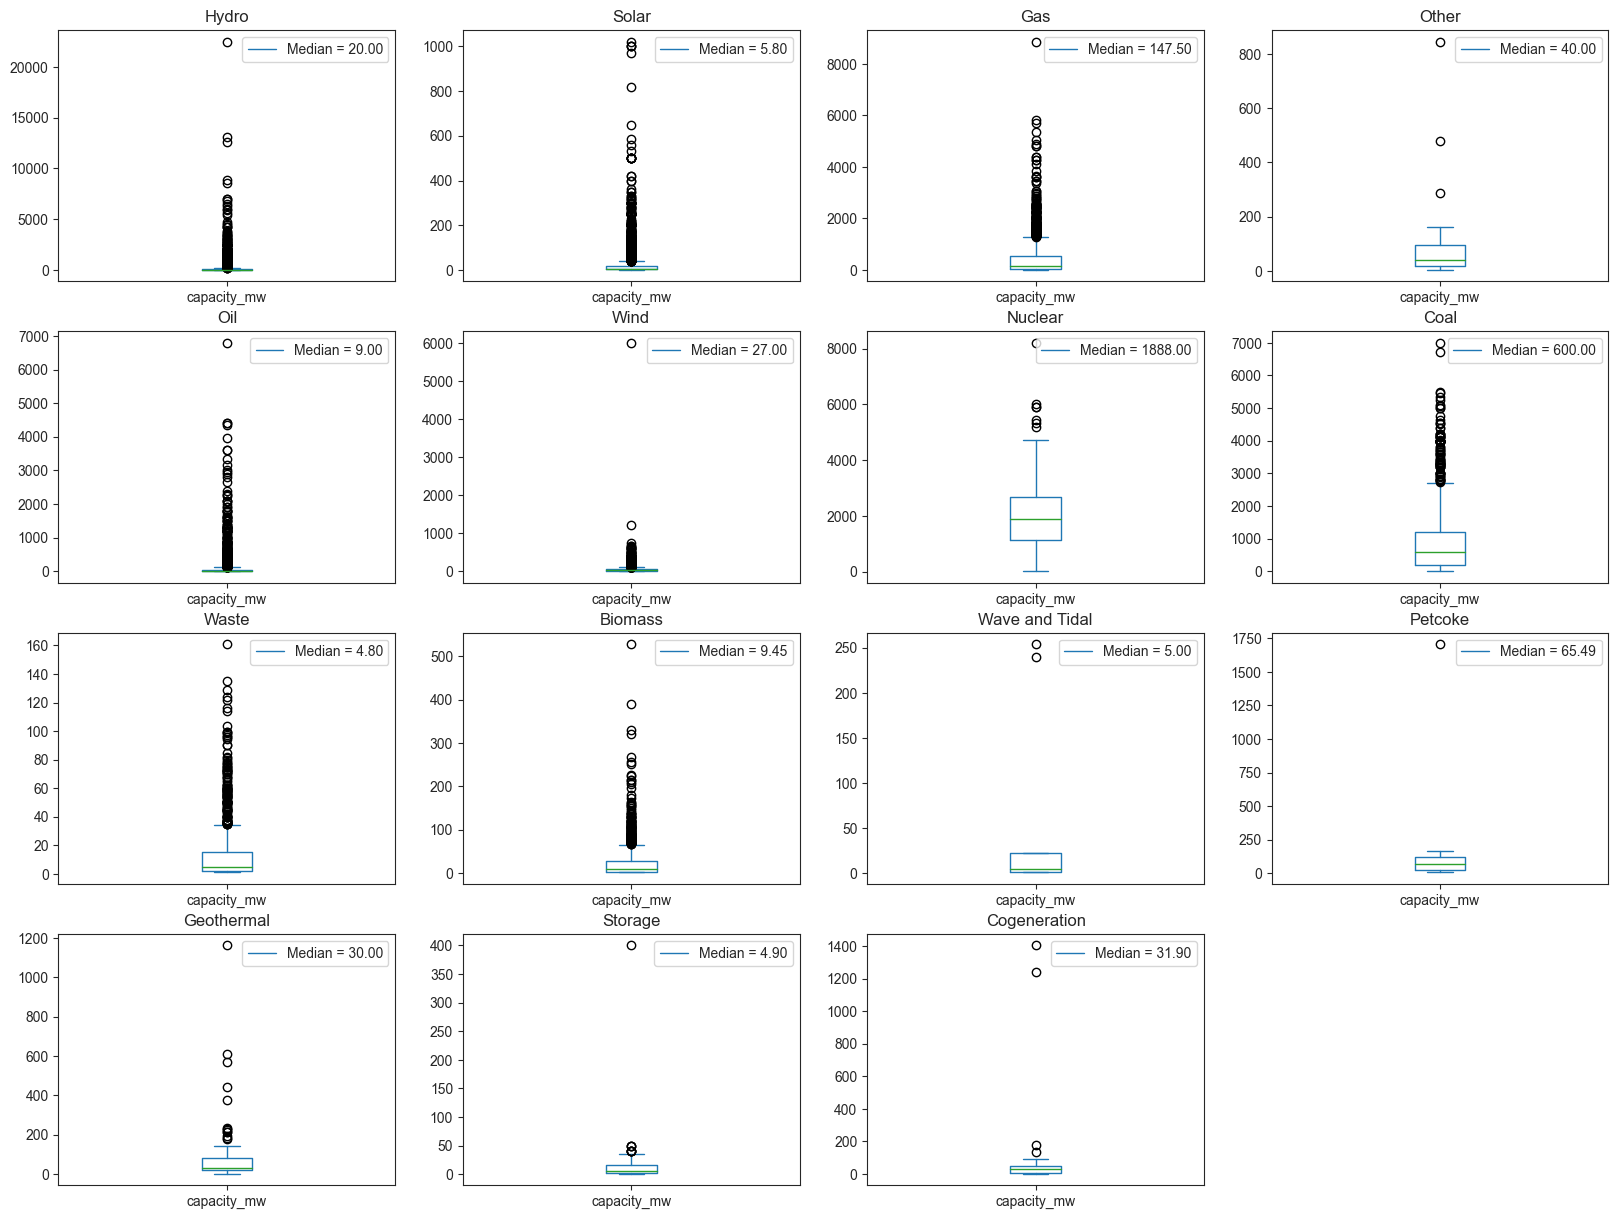

In [42]:
plt.figure(figsize = (20, 15))

def fuel_capacity_outliers(fuels, row_serial, column_serial, fig_serial):
    plt.subplot(row_serial, column_serial, fig_serial)
    fuel_capacity = df[df['primary_fuel'] == fuels].capacity_mw
    fuel_capacity.plot(kind = 'box')
    plt.title(fuels)
    plt.legend(['Median = {:.2f}'.format(fuel_capacity.median())], loc = 'best')

fuels = (df['primary_fuel'].unique()).tolist()
column_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
row_serial = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

for i, j ,k, p in zip(fuels, row_serial, column_serial, fig_serial):
    fuel_capacity_outliers(i, j, k, p)

__Nuclear__ is the most stable type of fuel, with a Median of about 2000 MW.

<a id = "Querying-information"></a>

# __Querying some vital information__

## 1. Visualizing the the geographical distribution of powerplants

c:\users\jilan\appdata\local\programs\python\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


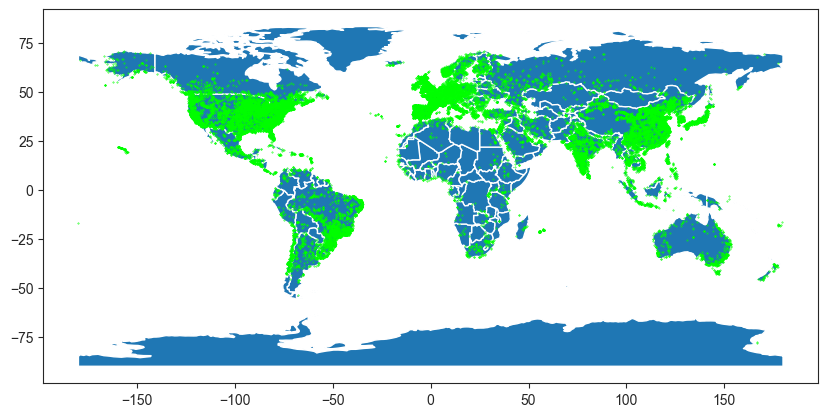

In [43]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (10, 6)), marker = '.', color = 'lime', markersize = .5, alpha = 1);

1. Power Plants are spreaded all over the world. But- USA, Europe, China and India => these regions seems to be the most densely populated with the plants. 
1. Distribution of plants in Russia is surprisingly less dense (may be due to the lesser amount of data was available from Russia). 
1. The green dots in the middle of the Pacific and Atlantic indicate that there are many offshore power plants (Wave & Tidal based plants).

## 2. What is the Global Power Generation Capacity? 

In [44]:
print("Global Generation Capacity = ", df['capacity_mw'].sum()/1000, "GW")

Global Generation Capacity =  5706.975447256999 GW


## 3. Which are the top 10 countries with most No. of Power Plants? 

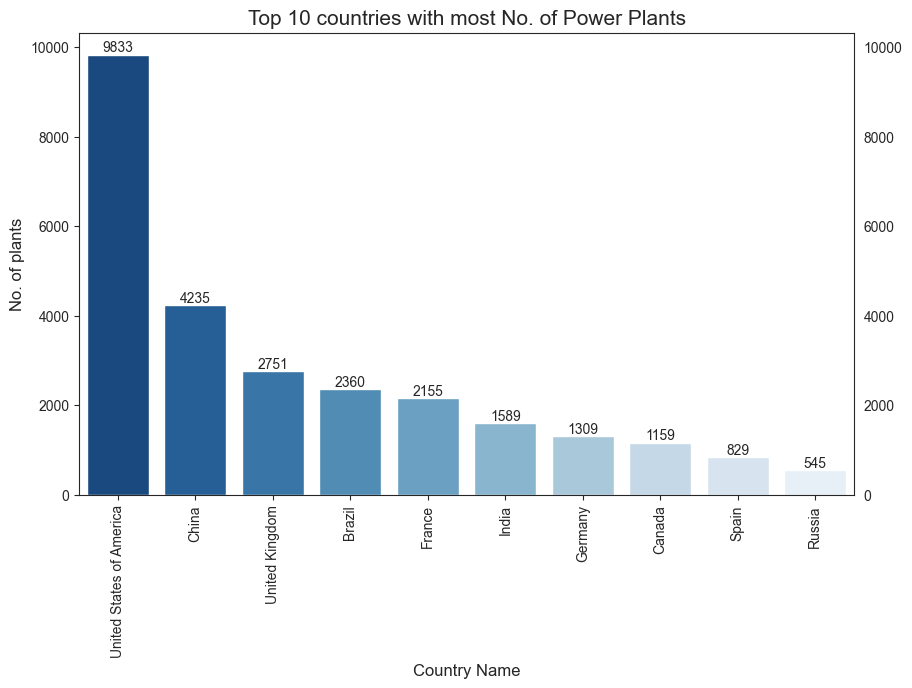

In [45]:
plt.figure(figsize = (10, 6))
plt.tick_params(labelright = True)

country_plants = df['country_name'].value_counts().head(10)
ax = sns.barplot(x = country_plants.index, y = country_plants, palette = "Blues_r")
ax.bar_label(ax.containers[0])

plt.title('Top 10 countries with most No. of Power Plants', size = 15)
plt.xlabel('Country Name', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('No. of plants', size = 12);

__Observations__:

_USA_ has the the most No. of power plants. _China_ has second most No. of power plants. Lets analyze, which types of fuel run these plants :

In [46]:
print("USA \n")
df[df['country_name'] == 'United States of America'].primary_fuel.value_counts()

USA 



Solar           3283
Gas             1818
Hydro           1449
Wind            1139
Oil              876
Waste            541
Coal             286
Biomass          153
Storage          104
Geothermal        65
Nuclear           58
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [47]:
print("China \n")
df[df['country_name'] == 'China'].primary_fuel.value_counts()

China 



Solar         1318
Hydro          947
Coal           946
Wind           835
Gas            170
Nuclear         12
Oil              5
Geothermal       2
Name: primary_fuel, dtype: int64

__Findings__ :

1. _USA_ : Apart of the Solar based plants, Gas, Hydro, Wind & Oil are the dominant type of fuels which run most of the plants of USA. Also, there are 541 Waste based power plants indicates that- USA waste recycling capacity of USA is pretty good. 
1. _China_ : Apart of the Solar based plants, Hydro, Coal & Wind are the dominant type of fuels which run most of the plants of China. The enormous 946 No. of coal based plants validate the fact that, China is the number one $ CO_{2} $ emitter in the world.

## 4. Which are the top 10 countries with Highest Generation Capacity? 

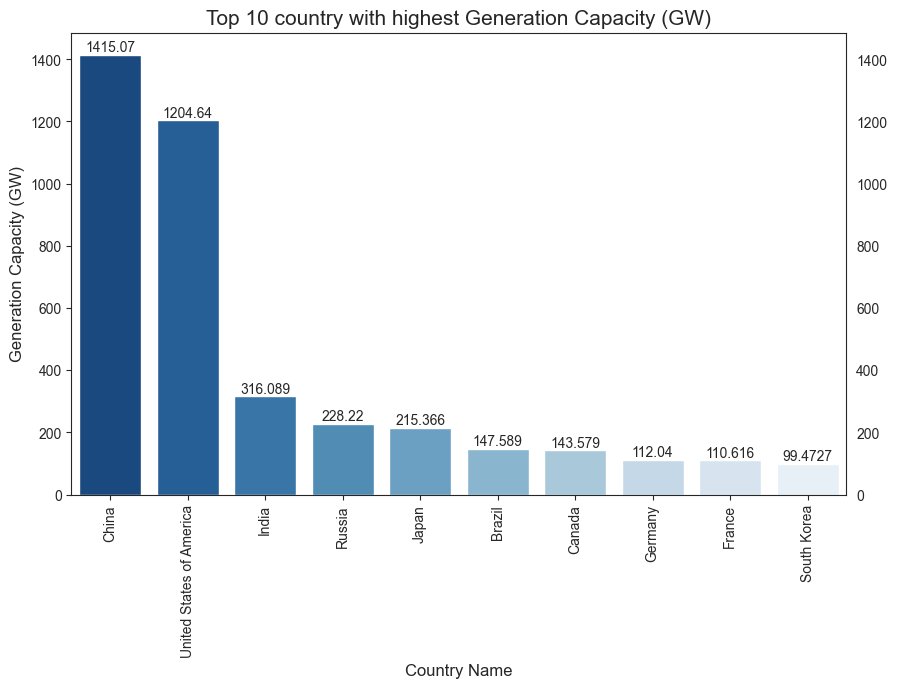

In [48]:
plt.figure(figsize = (10, 6))
plt.tick_params(labelright = True)

country_gen = (df.groupby(['country_name'])['capacity_mw'].sum()/1000).nlargest(10).sort_values(ascending = False)
ax = sns.barplot(x = country_gen.index, y = country_gen, palette = "Blues_r")
ax.bar_label(ax.containers[0])

plt.title('Top 10 country with highest Generation Capacity (GW)', size = 15)
plt.xlabel('Country Name', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Generation Capacity (GW)', size = 12);

__Observations__:

As expected, _China_ and _USA_ are the top two countries in the list of highest Generation Capacity. 

Lets Analyze from what sources do they generate these power : 

In [49]:
# China 

for i in ['China', 'United States of America']:
    print(f'{i}\n', ' \n', df[df['country_name'] == i].groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending = False), '\n\n')

China
  
 primary_fuel
Coal          955718.00
Hydro         259025.60
Gas            59774.50
Solar          54801.82
Wind           50990.36
Nuclear        33402.00
Oil             1329.00
Geothermal        26.10
Name: capacity_mw, dtype: float64 


United States of America
  
 primary_fuel
Gas             546435.80
Coal            249149.10
Wind            104476.90
Nuclear         104233.10
Hydro           101656.90
Solar            37970.35
Oil              37143.40
Waste             9768.50
Biomass           5123.20
Geothermal        3889.20
Petcoke           2361.60
Cogeneration      1042.00
Storage            815.60
Other              572.40
Name: capacity_mw, dtype: float64 




__Findings__:

- China uses enormous amount of _Coal_ which is 4 times higher than USA! 
- Seems like, USA's generation mix is more diverse than that of China's. China's _Coal+Hydro_ based plants are counterd by USA's _Gas+Coal+Wind+Nuclear_ based plants.

## 5. Which type of fuel run the most No. of Plants? 

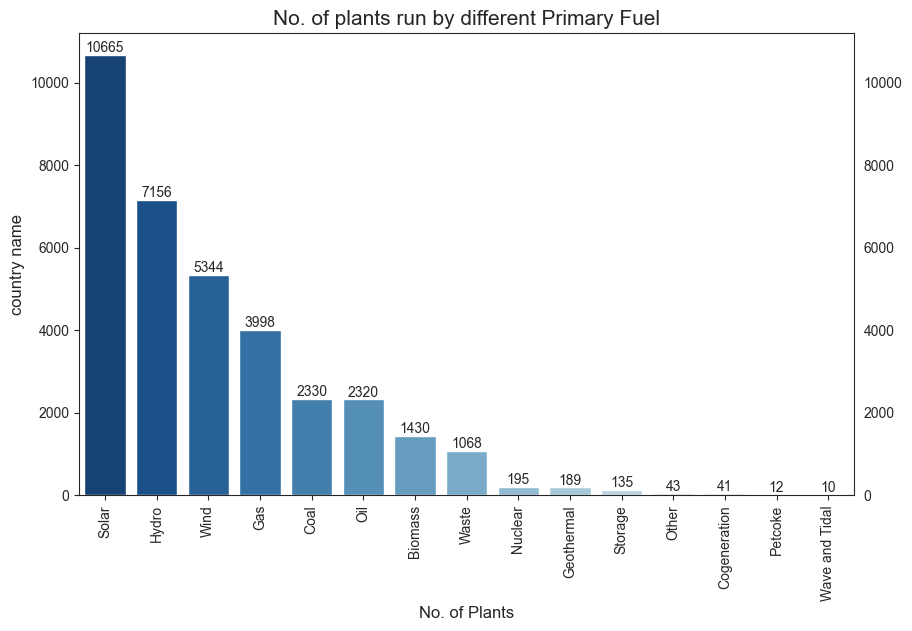

In [50]:
plt.figure(figsize = (10, 6))
plt.tick_params(labelright=True)

fuel_plant = df['primary_fuel'].value_counts()
ax = sns.barplot(x = fuel_plant.index, y = fuel_plant, palette = "Blues_r")
ax.bar_label(ax.containers[0])

plt.title('No. of plants run by different Primary Fuel', size = 15)
plt.xlabel('No. of Plants', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('country name', size = 12);

__Observations__:

- Renewable fuel based plants __Solar, Hydro & Wind__ topped the list.  
- Among the non_Renewables, __Gas, Coal & Oil__ based plants are the most in number. 

## 6. Generation Capacity of different types of primary fuel

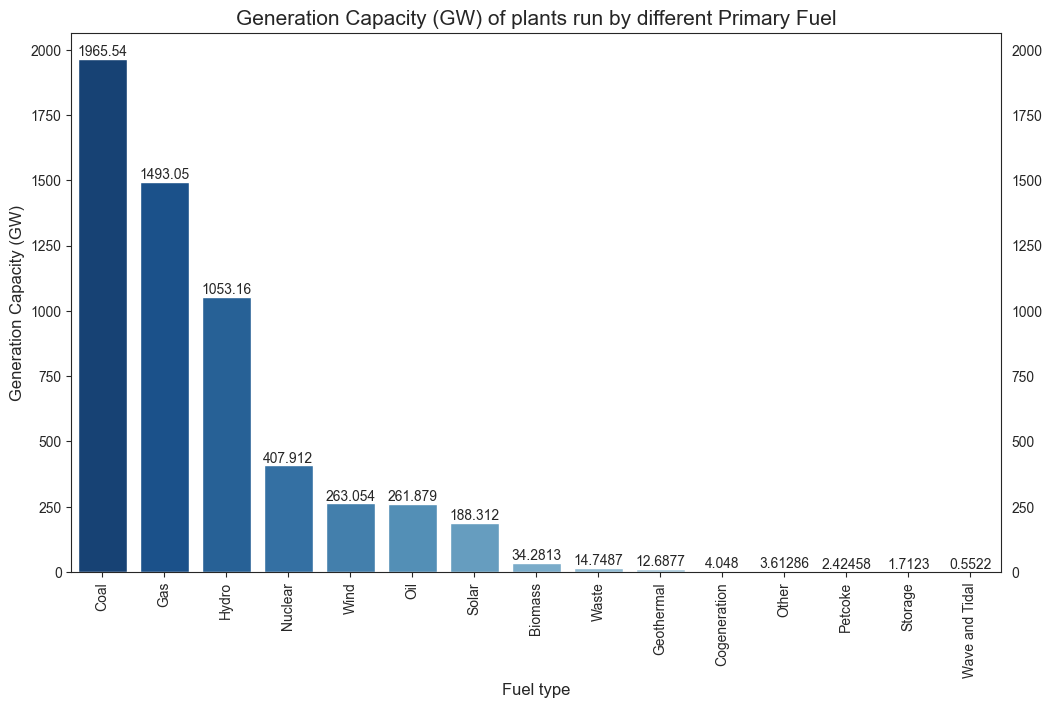

In [51]:
plt.figure(figsize = (12, 7))
plt.tick_params(labelright = True)

fuel_gen = ((df.groupby(['primary_fuel'])['capacity_mw'].sum())/1000).sort_values(ascending = False)
ax = sns.barplot(x = fuel_gen.index, y = fuel_gen, palette = "Blues_r")
ax.bar_label(ax.containers[0])

plt.title('Generation Capacity (GW) of plants run by different Primary Fuel', size = 15)
plt.xlabel('Fuel type', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Generation Capacity (GW)', size = 12);

__Observations__:

- __Coal__ based power plants produce the most amount of power in the world. This fact may have a potential connection with the global warming. 
- __Gas, Hydro & Nuclear__ are 2nd, 3rd & 4th in the list. 

## 7. What are the Avg. Generation Capacity (MW) per unit of Plant of different Primary Fuels

In [52]:
fuel_plant_qty = df['primary_fuel'].value_counts().sort_index()
fuel_plant_gen = df.groupby(['primary_fuel'])['capacity_mw'].sum().sort_index()

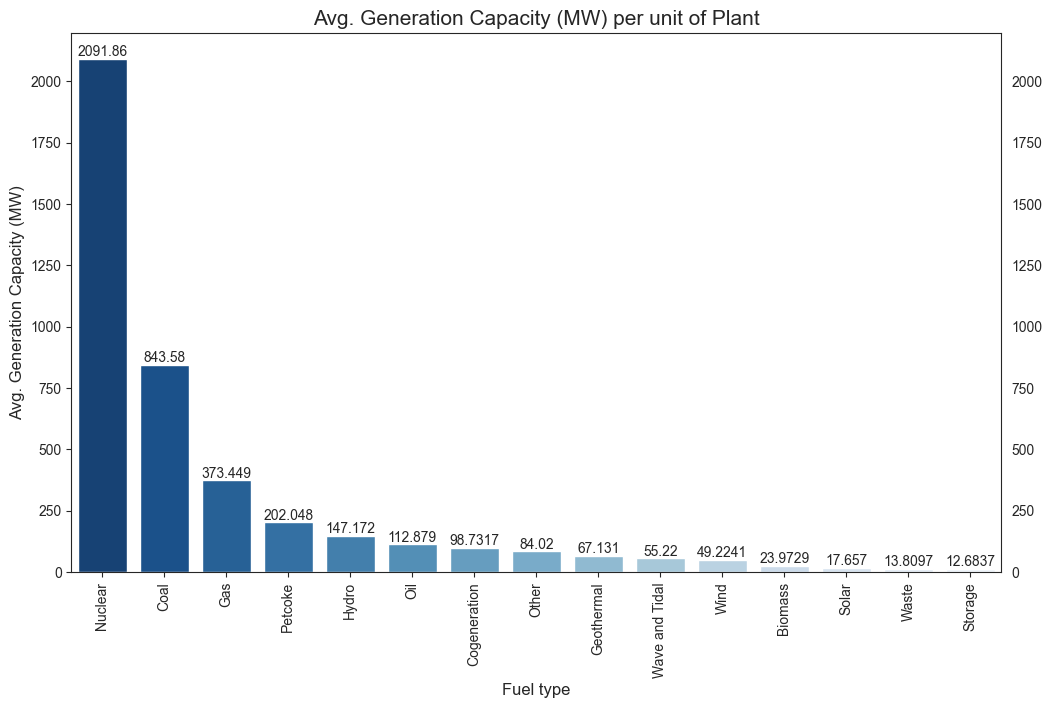

In [53]:
plt.figure(figsize = (12, 7))
plt.tick_params(labelright = True)

fuel_gen_per_plant = (fuel_plant_gen / fuel_plant_qty).sort_values(ascending = False)
ax = sns.barplot(x = fuel_gen_per_plant.index, y = fuel_gen_per_plant, palette = "Blues_r")
ax.bar_label(ax.containers[0])

plt.title('Avg. Generation Capacity (MW) per unit of Plant', size = 15)
plt.xlabel('Fuel type', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Avg. Generation Capacity (MW)', size = 12);

__Observations__:

- __Nuclear__ type power plants has the most Avg. generation capacity per unit of plant(2100 MW), which is almost 2.5 times higher than __Coal__ based plants. 
- As expected, __Solar__ & __Wastage__ based plants has the least generation capacity per unit of plant. 

## 8. Which are the top 10 Power Plants with highest generation capacity (in MW)

In [54]:
df.groupby(['plant_name', 'country_name', 'primary_fuel'])['capacity_mw'].sum().nlargest(10)

plant_name                               country_name  primary_fuel
Three Gorges Dam                         China         Hydro           22500.0
Baihetan Dam                             China         Hydro           13050.0
Xiluodu                                  China         Hydro           12600.0
Surgutskaya GRES-2                       Russia        Gas              8865.0
Simon Bolivar (Guri)                     Venezuela     Hydro            8851.0
Tucuruí                                  Brazil        Hydro            8535.0
Kashiwazaki Kariwa                       Japan         Nuclear          8212.0
East Hope Metals Wucaiwan power station  China         Coal             7000.0
Itaipu (Parte Brasileira)                Brazil        Hydro            7000.0
Itaipu Binacional Dam (Paraguay part)    Paraguay      Hydro            7000.0
Name: capacity_mw, dtype: float64

__Observations__:

- __Hydro__ power plants dominate the list of most powerful power plants in the world. The POWER of WATER !
- __China__ has the most No. of plants (4) in  the top 10. 3 of them are run by _Hydro_ & the rest run by _Coal_.

## 9. Which are the Plants with highest generation capacity (in MW) of different fuel types?

In [55]:
def largest_plant(fuel_type):
    df_fuel = df[df['primary_fuel'] == fuel_type]
    return (df_fuel.groupby(['primary_fuel', 'plant_name', 'country_name'])['capacity_mw'].sum().nlargest(1))

for i in df['primary_fuel'].unique():
    print(largest_plant(i), '\n\n')

primary_fuel  plant_name        country_name
Hydro         Three Gorges Dam  China           22500.0
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name  country_name
Solar         Miraah CSP  Oman            1021.0
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name          country_name
Gas           Surgutskaya GRES-2  Russia          8865.0
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name  country_name
Other         PARANA      Argentina       845.26
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name    country_name
Oil           SHAIBA (SEC)  Saudi Arabia    6794.0
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name       country_name
Wind          Gansu Wind Farm  China           6000.0
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name          country_name
Nuclear       Kashiwazaki Kariwa  Japan           8212.0
Name: capacity_mw, dtype: float64 


primary_fuel  plant_name                               country_nam

__Observations__:

- China's Three Georges Dam has an enormous generation capacity of 22500 MW !!!
- Surgutskaya Gas based Plant has a huge Generation Capacity of almost 9000 MW !
- Saudi Arabia owns the largest oil based power plant in the world; SHAIBA plant has a capacity of almost 7000 MW !
- Miraah Solar based Plant of Oman has the generation capacity of 1000+ MW, which is more than 50 times greater than global avg. gen. capacity of solar plants ! 
- South Korea owns the world's most powerful Tiadal power plant based on the Sihwa Lake. 
- USA's Covington Facility is the world's largest waste based power plant.

## 10. Top 10 Nuclear Power Plants with highest generation capacity

In [56]:
df_nuclear = df[df['primary_fuel'] == 'Nuclear']
df_nuclear.groupby(['plant_name', 'country_name', 'plant_location'])['capacity_mw'].sum().nlargest(10)

plant_name          country_name              plant_location
Kashiwazaki Kariwa  Japan                     Kashiwazaki       8212.0
Zaporozhye          Ukraine                   Zaporozhye        6000.0
Hanbit              South Korea               Hanbit            5900.0
Hanul               South Korea               Hanul             5900.0
GRAVELINES          France                    GRAVELINES        5460.0
PALUEL              France                    PALUEL            5320.0
CATTENOM            France                    CATTENOM          5200.0
Ohi                 Japan                     Ohi               4710.0
Fukushima Daina     Japan                     Fukushima         4400.0
Palo Verde          United States of America  Palo              4209.6
Name: capacity_mw, dtype: float64

## 11. Which Countries own the most No. of Nuclear Plants? 

In [57]:
df_nuclear['country_name'].value_counts().head(10)

United States of America    58
France                      19
Japan                       16
China                       12
Russia                      10
India                        9
United Kingdom               8
Germany                      7
Canada                       6
South Korea                  6
Name: country_name, dtype: int64

__Observations__:

- USA owns the most No. of Nuclear Power Plants in the world (58)
- France holds the 2nd place with 19 Nuclear based power plants. To check this issue in detail, Let's check the generation mix of France: 

In [58]:
df[df['country_name'] == 'France'].groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending = False)

primary_fuel
Nuclear           63130.0000
Hydro             19505.7799
Wind               9062.6320
Gas                5007.0000
Solar              4910.4170
Oil                4388.0000
Coal               3575.0000
Biomass             792.6000
Wave and Tidal      240.0000
Geothermal            4.5000
Name: capacity_mw, dtype: float64

__Findings__:

WOW! As we suspected, Nuclear is the top class fuel of France. 19 Nuclear Plants produce 63000+ MW of power !

## 12. Which corporations (Shareholders) own the most No. of Plants?

In [59]:
df['owner'].mask(lambda x : x.eq('Not_Recorded')).value_counts().head(10)

Cypress Creek Renewables                  212
Hydro-Québec                              185
Lightsource Renewable Energy              125
China Huaneng Group Corporation (CHNG)    112
Emeishan Aluminum (Group) Co              106
CFE                                       105
Golden Springs Development Company LLC     97
Sustainable Power Group  LLC               94
Verbund                                    86
Tesla Inc.                                 86
Name: owner, dtype: int64

__Observations__:

Cypress Creek Renewables of USA, owns the most No. of Power Plants. 

## 13. What is the percentage of renewable and non-renewable power generation capacity?

#### Lets split the DataFrame based on renewable sources & non renewable sources

In [60]:
# N.B : Although nuclear energy itself is a renewable energy source, the material used in nuclear power plants is not.
# So, In this project Nuclear based Power Plants are considered as non-renewable. 

renew_fuels = ['Hydro', 'Wind', 'Solar', 'Geothermal', 'Wave and Tidal', 'Cogeneration', 'Waste']
non_renew_fuels = [i for i in df['primary_fuel'].unique().tolist() if i not in renew_fuels]
non_renew_fuels

['Gas', 'Other', 'Oil', 'Nuclear', 'Coal', 'Biomass', 'Petcoke', 'Storage']

In [61]:
# DatFrame of renewable generation
df_renew = df[df['primary_fuel'].isin(renew_fuels)]

# DatFrame of non_renewable generation
df_non_renew = df[df['primary_fuel'].isin(non_renew_fuels)]

Percent of Renew generation =  26.92 %
Percent of Non Renew generation =  73.08


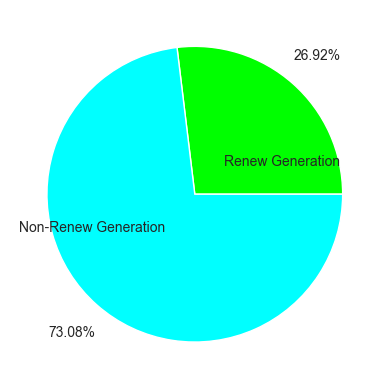

In [62]:
total_gen_cap = round((df['capacity_mw'].sum())/1000, 3)
renew_gen_cap = round((df_renew['capacity_mw'].sum())/1000, 3)
non_renew_gen_cap = round((df_non_renew['capacity_mw'].sum())/1000, 3)

renew_percent = round((renew_gen_cap/total_gen_cap) * 100, 2)
non_renew_percent = round((non_renew_gen_cap/total_gen_cap) * 100, 2)

print('Percent of Renew generation = ', renew_percent, '%')
print('Percent of Non Renew generation = ', non_renew_percent)

gen_percent = np.array([renew_percent, non_renew_percent])
plt.pie(gen_percent, autopct = '%1.2f%%', colors = ['lime', 'cyan'],labels = ['Renew Generation', 'Non-Renew Generation'],
       textprops = {'fontsize': 10}, pctdistance = 1.25, labeldistance = .3);

__Observations__:

Still almost three quarter of the global power generation is based on non-Renewables. 

## 14. Which countries have highest capacity of generating Renewable Energy?

### Country-wise Renewable Energy Generation

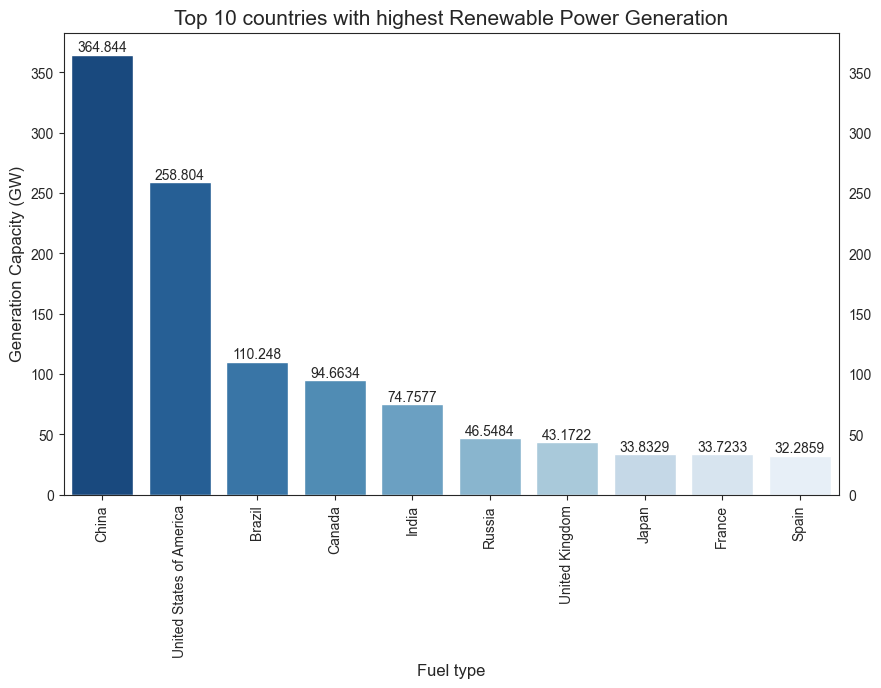

In [63]:
plt.figure(figsize = (10, 6))
plt.tick_params(labelright = True)

renew_country = ((df_renew.groupby(['country_name'])['capacity_mw'].sum())/1000).nlargest(10).sort_values(ascending = False)
ax = sns.barplot(x = renew_country.index, y = renew_country, palette = 'Blues_r')
ax.bar_label(ax.containers[0])

plt.title('Top 10 countries with highest Renewable Power Generation', size = 15)
plt.xlabel('Fuel type', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Generation Capacity (GW)', size = 12);

__Observations__:

- China generates the most amount of renewable energy, thanks to its gigantic Hydroelectric dams. 
- USA is on the 2nd place with its huge No. of Solar, Hydro & Wind based plants.

## 15. Which countries have highest percentage of renewable power generation capacity?

In [64]:
total_gen_cap = df.groupby(['country_name'])['capacity_mw'].sum().sort_index()
renew_gen_cap = df_renew.groupby(['country_name'])['capacity_mw'].sum().sort_index()

In [65]:
print(total_gen_cap.shape)
print(renew_gen_cap.shape)

(167,)
(150,)


__Observations__:

Among 167 countries, 150 has Renewable Plants. So, to compare correctly, we've to find out the common countries between dataframe contain total generation capacity (df) and dataframe contain renewable generation capacity (df_renew).

In [66]:
renew_country = df_renew.country_name.unique().tolist()
total_country = df['country_name'].isin(renew_country)

total_df = df[total_country]
total_gen_cap = total_df.groupby(['country_name'])['capacity_mw'].sum().sort_index()

print(total_gen_cap.shape)
print(renew_gen_cap.shape)

(150,)
(150,)


Now, we can compare between dataframes

In [67]:
# What percent of total generation is renewable generation? 

(renew_gen_cap * 100 / total_gen_cap).nlargest(20)

country_name
Bhutan                              100.000000
Burundi                             100.000000
Ethiopia                            100.000000
Iceland                             100.000000
Lesotho                             100.000000
Mali                                100.000000
Mozambique                          100.000000
Nepal                               100.000000
Palestine                           100.000000
Paraguay                            100.000000
Saint Lucia                         100.000000
Suriname                            100.000000
Democratic Republic of the Congo     98.749117
Norway                               95.533163
Albania                              93.590582
Malawi                               93.091303
Uganda                               91.974110
Tajikistan                           88.482743
Afghanistan                          86.025620
New Zealand                          82.590587
Name: capacity_mw, dtype: float64

__Observations__:

In the above list, most of the countries have low generation capacity. That's why their renewable pecent is so high. So for fair analysis, lets find out top 10 countries with highest percentage of Renewable Generation Capacity, from the list of top 50 countries with highest generation capacity.

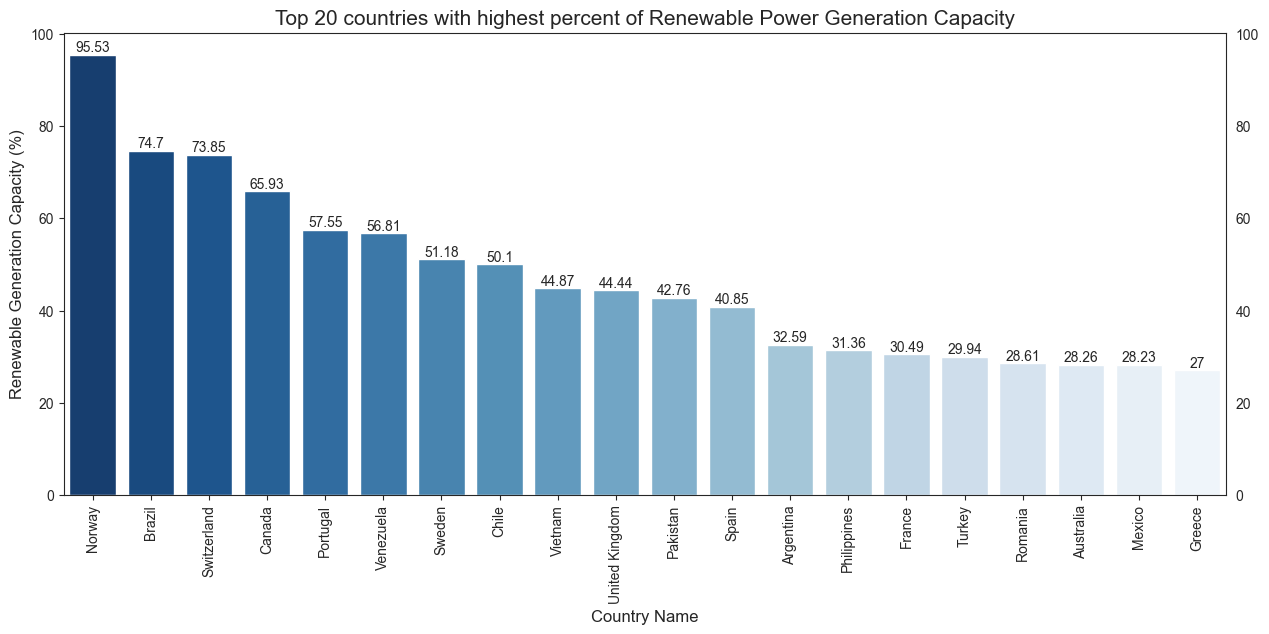

In [68]:
top_50_gen_cap = df.groupby('country_name')['capacity_mw'].sum().nlargest(50).sort_index()
top_50_renew_gen_cap = df_renew[df_renew['country_name'].isin(top_50_gen_cap.index)].groupby('country_name')['capacity_mw'].sum()

# What percent of total generation is renewable generation? 
top_10_renew_percent_among_top_50 = round((top_50_renew_gen_cap * 100 / top_50_gen_cap), 2).nlargest(20)

plt.figure(figsize = (15, 6))
plt.tick_params(labelright = True)
ax = sns.barplot(x = top_10_renew_percent_among_top_50.index, y = top_10_renew_percent_among_top_50, palette = "Blues_r")
ax.bar_label(ax.containers[0])
plt.title('Top 20 countries with highest percent of Renewable Power Generation Capacity', size = 15)
plt.xlabel('Country Name', size = 12)
plt.xticks(rotation = 90)
plt.ylabel('Renewable Generation Capacity (%)', size = 12);

__Findings__:

- __Norway__, __Brazil__, __Switzerland__ & __Canada__ topped the list of Renewable Generation percentage. It's quite amazing that, almost 96% of total power of __Norway__ is generated from renewable sources.  
- None among __United States__, __China__, __Russia__ or __India__ is in the top 20. 

## 16. Which Fuel is accountable for most amount of Non-Renewable Energy Generation?

In [69]:
((df_non_renew.groupby(['primary_fuel'])['capacity_mw'].sum())/1000).sort_values(ascending = False).apply(lambda x : '{:.3f} GW'.format(x))

primary_fuel
Coal       1965.541 GW
Gas        1493.051 GW
Nuclear     407.912 GW
Oil         261.879 GW
Biomass      34.281 GW
Other         3.613 GW
Petcoke       2.425 GW
Storage       1.712 GW
Name: capacity_mw, dtype: object

__Observations__:

As expected, __Coal__ and __Gas__ are the main players from the non-Renewable side. 

## 16. Which Fuel is accountable for most amount of Renewable Energy Generation?

In [70]:
((df_renew.groupby(['primary_fuel'])['capacity_mw'].sum())/1000).sort_values(ascending = False).apply(lambda x : '{:.3f} GW'.format(x))

primary_fuel
Hydro             1053.160 GW
Wind               263.054 GW
Solar              188.312 GW
Waste               14.749 GW
Geothermal          12.688 GW
Cogeneration         4.048 GW
Wave and Tidal       0.552 GW
Name: capacity_mw, dtype: object

__Observations__:

Hydroelectric dams, Wind turbines and Solar Panels try their hardest to save the planet from the aggressive non-Renewables. Although, till now they are nowhere near to kill the game. But, world should not lose hope over the Renewables. __May be a little bit of innovation in the Solar Circuits or little more potential energy gain in the Hydroelectric dams or better geometry of the turbine blades - will turn the table around.__

## 17. Analyze the year-wise installation capacity

In [71]:
df['commissioning_year'].nunique()

123

There are 123 unique years in our dataset.

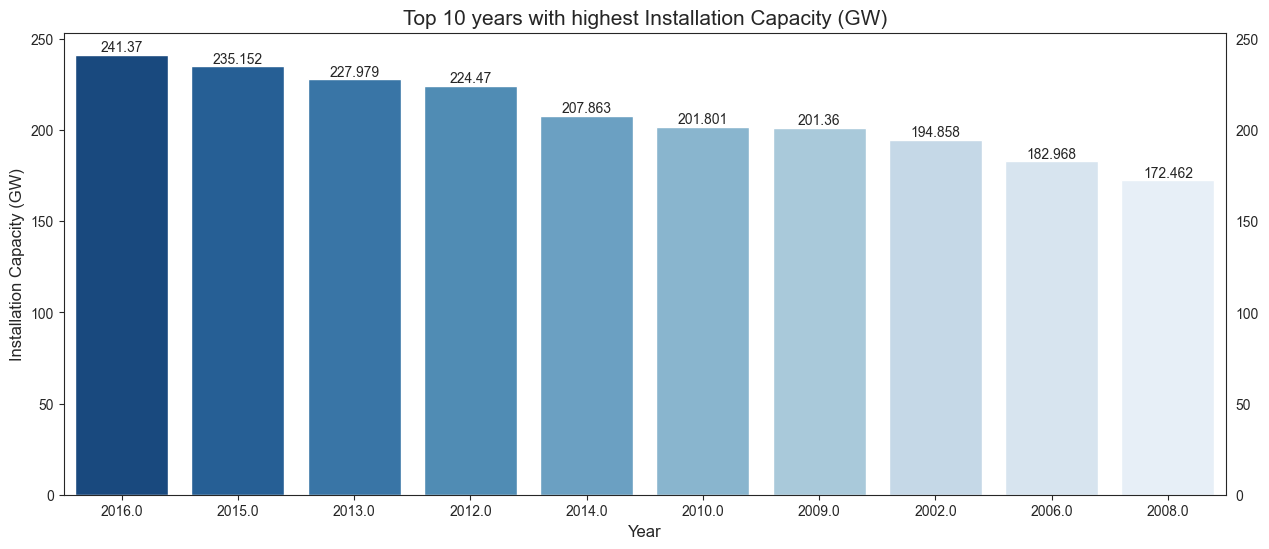

In [72]:
install_cap_over_years = ((df.groupby('commissioning_year')['capacity_mw'].sum())/1000).nlargest(10).sort_values(ascending = False)

plt.figure(figsize = (15, 6))
plt.tick_params(labelright = True)
ax = sns.barplot(x = install_cap_over_years.index.astype(str), y = install_cap_over_years, palette = "Blues_r")
ax.bar_label(ax.containers[0])
plt.title('Top 10 years with highest Installation Capacity (GW)', size = 15)
plt.xlabel('Year', size = 12)
plt.xticks(rotation = 0)
plt.ylabel('Installation Capacity (GW)', size = 12);

__Observations:__

- So, among the 123 years, in the year of 2015, new installation capacity was highest. 
- All of the top 10 years with highest new installation capacity, is in 21st Century. 

### Visualizing the trend of Year-wise New Installation Capacity

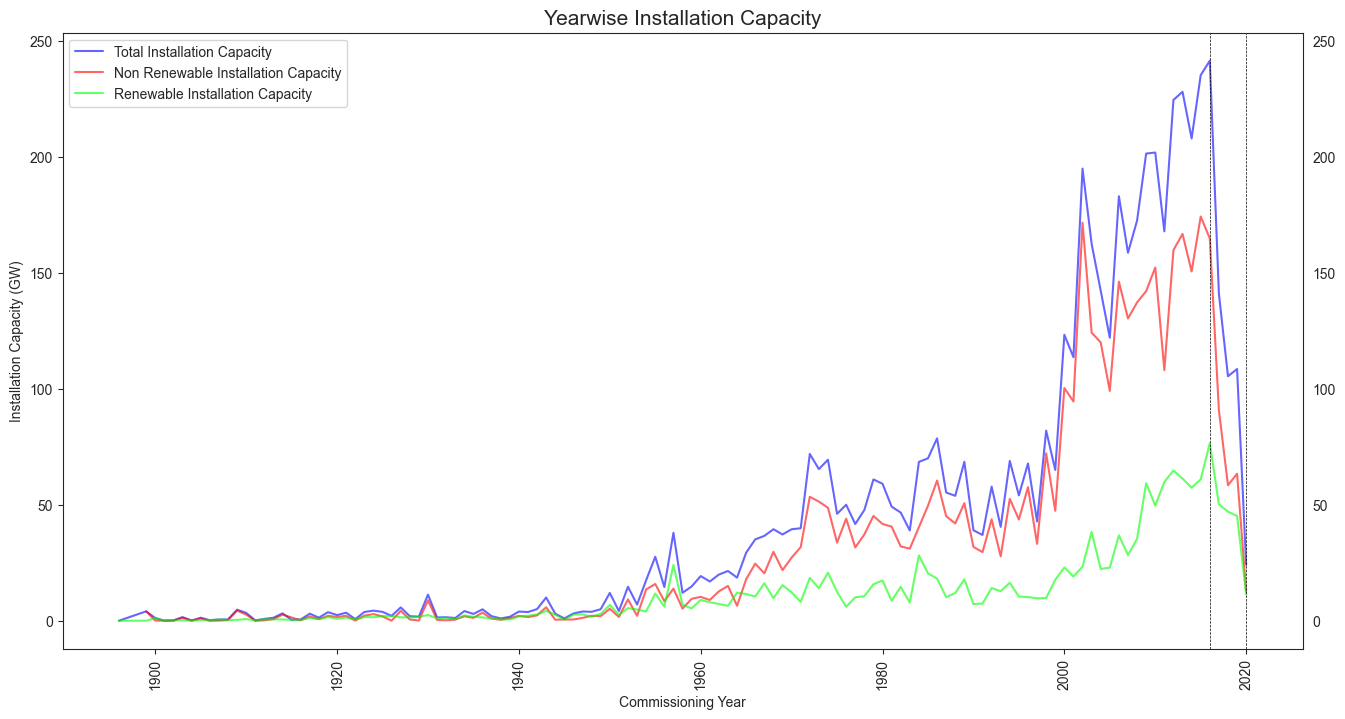

In [73]:
plt.figure(figsize = (16, 8))
plt.tick_params(labelright = True)

(df.groupby('commissioning_year')['capacity_mw'].sum()/1000).plot(kind = 'line', color = 'b', alpha = 0.6)
(df_non_renew.groupby('commissioning_year')['capacity_mw'].sum()/1000).plot(kind = 'line', color = 'r', alpha = 0.6)
(df_renew.groupby('commissioning_year')['capacity_mw'].sum()/1000).plot(kind = 'line', color = 'lime', alpha = 0.6)

plt.xlabel('Commissioning Year', size = 10)
plt.ylabel('Installation Capacity (GW)', size = 10)
plt.title('Yearwise Installation Capacity', size = 15)
plt.xticks(size = 10, rotation = 'vertical')
plt.axvline(2016, linestyle = '--', linewidth = 0.5, color = 'black')
plt.axvline(2020, linestyle = '--', linewidth = 0.5, color = 'black')

plt.legend(labels = ['Total Installation Capacity', 'Non Renewable Installation Capacity', 'Renewable Installation Capacity']);

__Observations__:

- As expected, Installation Capacity gradually increases with the years; due to the invention of new generation technologies, ease of gathering materials to establish newer and newer plants etc. 
- The graph drastically falls below the trend (Showed by vertical lines). This is due to the lack of data in the latest years (2017 to 2020). For example, year 2020 has only 288 entries. Let's verify this issue by comparing 2020 data against 2014 data : 

In [74]:
print("occurance of 2014", df[df['commissioning_year'] == 2014].shape)
print("occurance of 2020", df[df['commissioning_year'] == 2020].shape)

occurance of 2014 (1632, 22)
occurance of 2020 (317, 22)


## 18. Generation Efficiency of different types of fuel
### Efficiency = Actual Generation/Estimated Generation

In [75]:
def eff_fuel(fuel_type, gen_year, estim_year):
    
    actual_gen_index = df[df[gen_year] != 'Not_Recorded'].index
    estim_gen_index = df[df[estim_year] != 'Not_Recorded'].index
    req_index = np.intersect1d(actual_gen_index, estim_gen_index)
    df_req = df[df.index.isin(req_index)]
    df_req_valid = df_req.loc[df_req[estim_year] > df_req[gen_year]]
    df_fuel = df_req_valid[df_req_valid['primary_fuel'] == fuel_type]
    
    if df_fuel[estim_year].sum() == 0:
        pass
    else: 
        print(("Efficiency of {} fueled plants in {} = {} %\n").format(fuel_type, gen_year.split('_')[-1], round((df_fuel[gen_year].sum()*100 / df_fuel[estim_year].sum()), 2)))

    
fuel_type = df['primary_fuel'].unique()
gen_year = gen_columns
estim_year = est_gen_columns

for i in fuel_type:
    for j,k in zip (gen_year, estim_year):
        eff_fuel(i, j, k)

Efficiency of Hydro fueled plants in 2013 = 24.02 %

Efficiency of Hydro fueled plants in 2014 = 23.28 %

Efficiency of Hydro fueled plants in 2015 = 24.86 %

Efficiency of Hydro fueled plants in 2016 = 24.42 %

Efficiency of Hydro fueled plants in 2017 = 22.44 %

Efficiency of Solar fueled plants in 2013 = 13.07 %

Efficiency of Solar fueled plants in 2014 = 15.85 %

Efficiency of Solar fueled plants in 2015 = 17.09 %

Efficiency of Solar fueled plants in 2016 = 45.47 %

Efficiency of Solar fueled plants in 2017 = 25.96 %

Efficiency of Gas fueled plants in 2017 = 23.6 %

Efficiency of Other fueled plants in 2017 = 9.3 %

Efficiency of Oil fueled plants in 2017 = 6.98 %

Efficiency of Wind fueled plants in 2013 = 49.03 %

Efficiency of Wind fueled plants in 2014 = 70.99 %

Efficiency of Wind fueled plants in 2015 = 70.84 %

Efficiency of Wind fueled plants in 2016 = 69.98 %

Efficiency of Wind fueled plants in 2017 = 59.92 %

Efficiency of Nuclear fueled plants in 2017 = 47.58 %

Effi

__Observations:__ 
- __Hydro__ based Powerplants was hoped to be more efficient. As, this type of power plants are the most efficient theoretically. 
- __Wind__ based power plants was hoped to be less efficient for the year of 2014, 2015 & 2016.

## 19. Yearwise Generation Efficiency

In [76]:
gen_year

['generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019']

In [77]:
def eff_fuel(gen_year, estim_year):
    
    actual_gen_index = df[df[gen_year] != 'Not_Recorded'].index
    estim_gen_index = df[df[estim_year] != 'Not_Recorded'].index
    req_index = np.intersect1d(actual_gen_index, estim_gen_index)
    df_req = df[df.index.isin(req_index)]
    df_req_valid = df_req.loc[df_req[estim_year] > df_req[gen_year]]
    
    if df_req_valid[estim_year].sum() == 0:
        pass
    else: 
        print(("Efficiency in {} = {} %").format(gen_year.split('_')[-1], round((df_req_valid[gen_year].sum() * 100 / df_req_valid[estim_year].sum()), 2)), '\n')


gen_year = gen_columns
estim_year = est_gen_columns

for j,k in zip (gen_year, estim_year):
    eff_fuel(j, k)

Efficiency in 2013 = 26.41 % 

Efficiency in 2014 = 26.77 % 

Efficiency in 2015 = 27.87 % 

Efficiency in 2016 = 29.5 % 

Efficiency in 2017 = 33.5 % 



__Observation:__

with the available data, The average generation efficiency per year is about 30% ; generation efficiency increases gradually in each year. 

## 20. Fuel-wise Frequency Distribution of Plants' Capacity

In [78]:
coal_data = df[df['primary_fuel'] == 'Coal']
gas_data = df[df['primary_fuel'] == 'Gas']
nuclear_data = df[df['primary_fuel'] == 'Nuclear']
oil_data = df[df['primary_fuel'] == 'Oil']
biomass_data = df[df['primary_fuel'] == 'Biomass']
petcoke_data = df[df['primary_fuel'] == 'Petcoke']

hydro_data = df[df['primary_fuel'] == 'Hydro']
wind_data = df[df['primary_fuel'] == 'Wind']
solar_data = df[df['primary_fuel'] == 'Solar']
geothermal_data = df[df['primary_fuel'] == 'Geothermal']
wave_data = df[df['primary_fuel'] == 'Wave and Tidal']

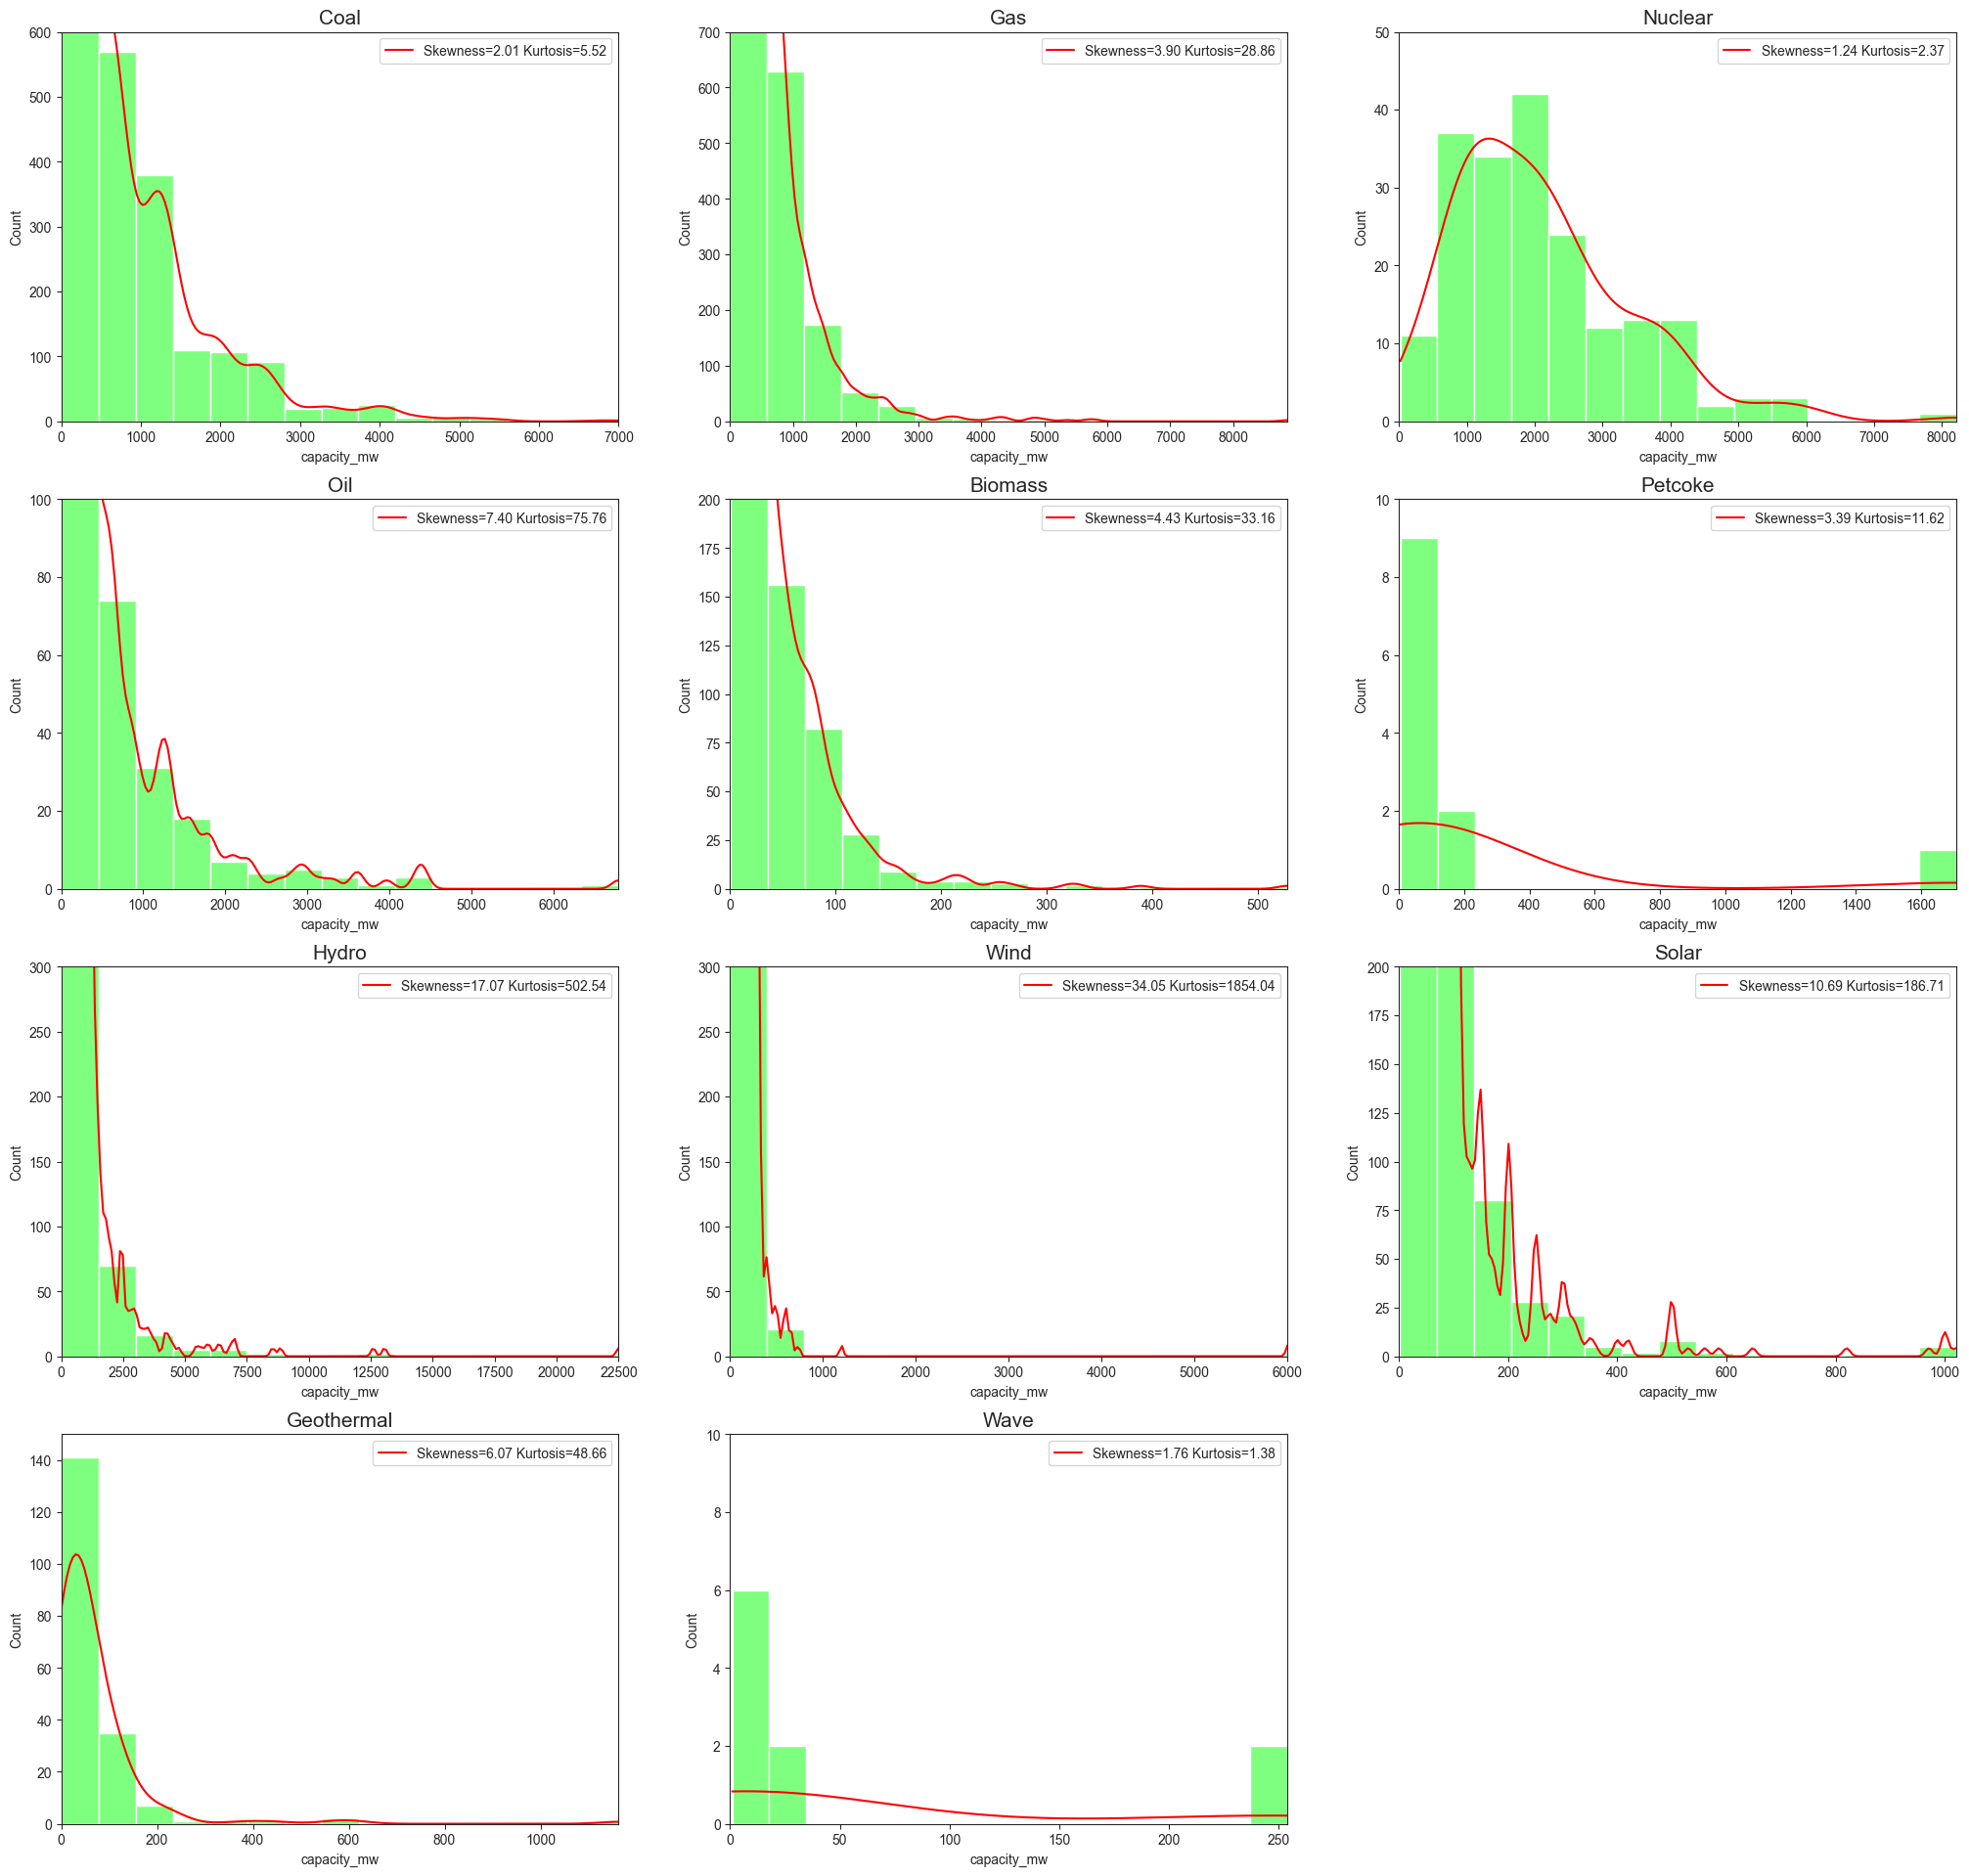

In [79]:
plt.figure(figsize = (25, 30))
def freq_dist(fuel_data, fuel_type, bins, row_serial, column_serial, fig_serial, y_upper):
    plt.subplot(row_serial, column_serial, fig_serial)
    ax = sns.histplot(fuel_data['capacity_mw'], kde = True, bins = 15, color = 'lime')
    ax.lines[0].set_color('r')
    x_lower = 0
    x_upper = max(fuel_data['capacity_mw'])
    y_lower = 0
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(fuel_data['capacity_mw'].skew(), fuel_data['capacity_mw'].kurt())], loc = 'best')
    plt.xlim(x_lower, x_upper)
    plt.ylim(y_lower, y_upper)
    plt.title(fuel_type, size = 15)
    
fuel_data = [coal_data, gas_data, nuclear_data, oil_data, biomass_data, petcoke_data,
             hydro_data, wind_data, solar_data, geothermal_data, wave_data]
fuel_type = ['Coal', 'Gas', 'Nuclear', 'Oil', 'Biomass', 'Petcoke',
             'Hydro', 'Wind', 'Solar', 'Geothermal', 'Wave']
bins = [15, 15, 15, 20, 15, 15, 15, 15, 20, 10, 10]
row_serial = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
column_serial = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
fig_serial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y_upper = [600, 700, 50, 100, 200, 10, 300, 300, 200, 150, 10]

for i, j, k, p, q, r, s in zip(fuel_data, fuel_type, bins, row_serial, column_serial, fig_serial, y_upper):
    freq_dist(i, j, k, p, q, r, s)

<a id = "data-particular-country"></a>

# __Summarizing the data of a particular country__

Enter the Country Name : Germany
Total No. of Plants =  1309
Total Generation Capacity =  112.04 (GW)

Geographical Locations of the Power plants of Germany


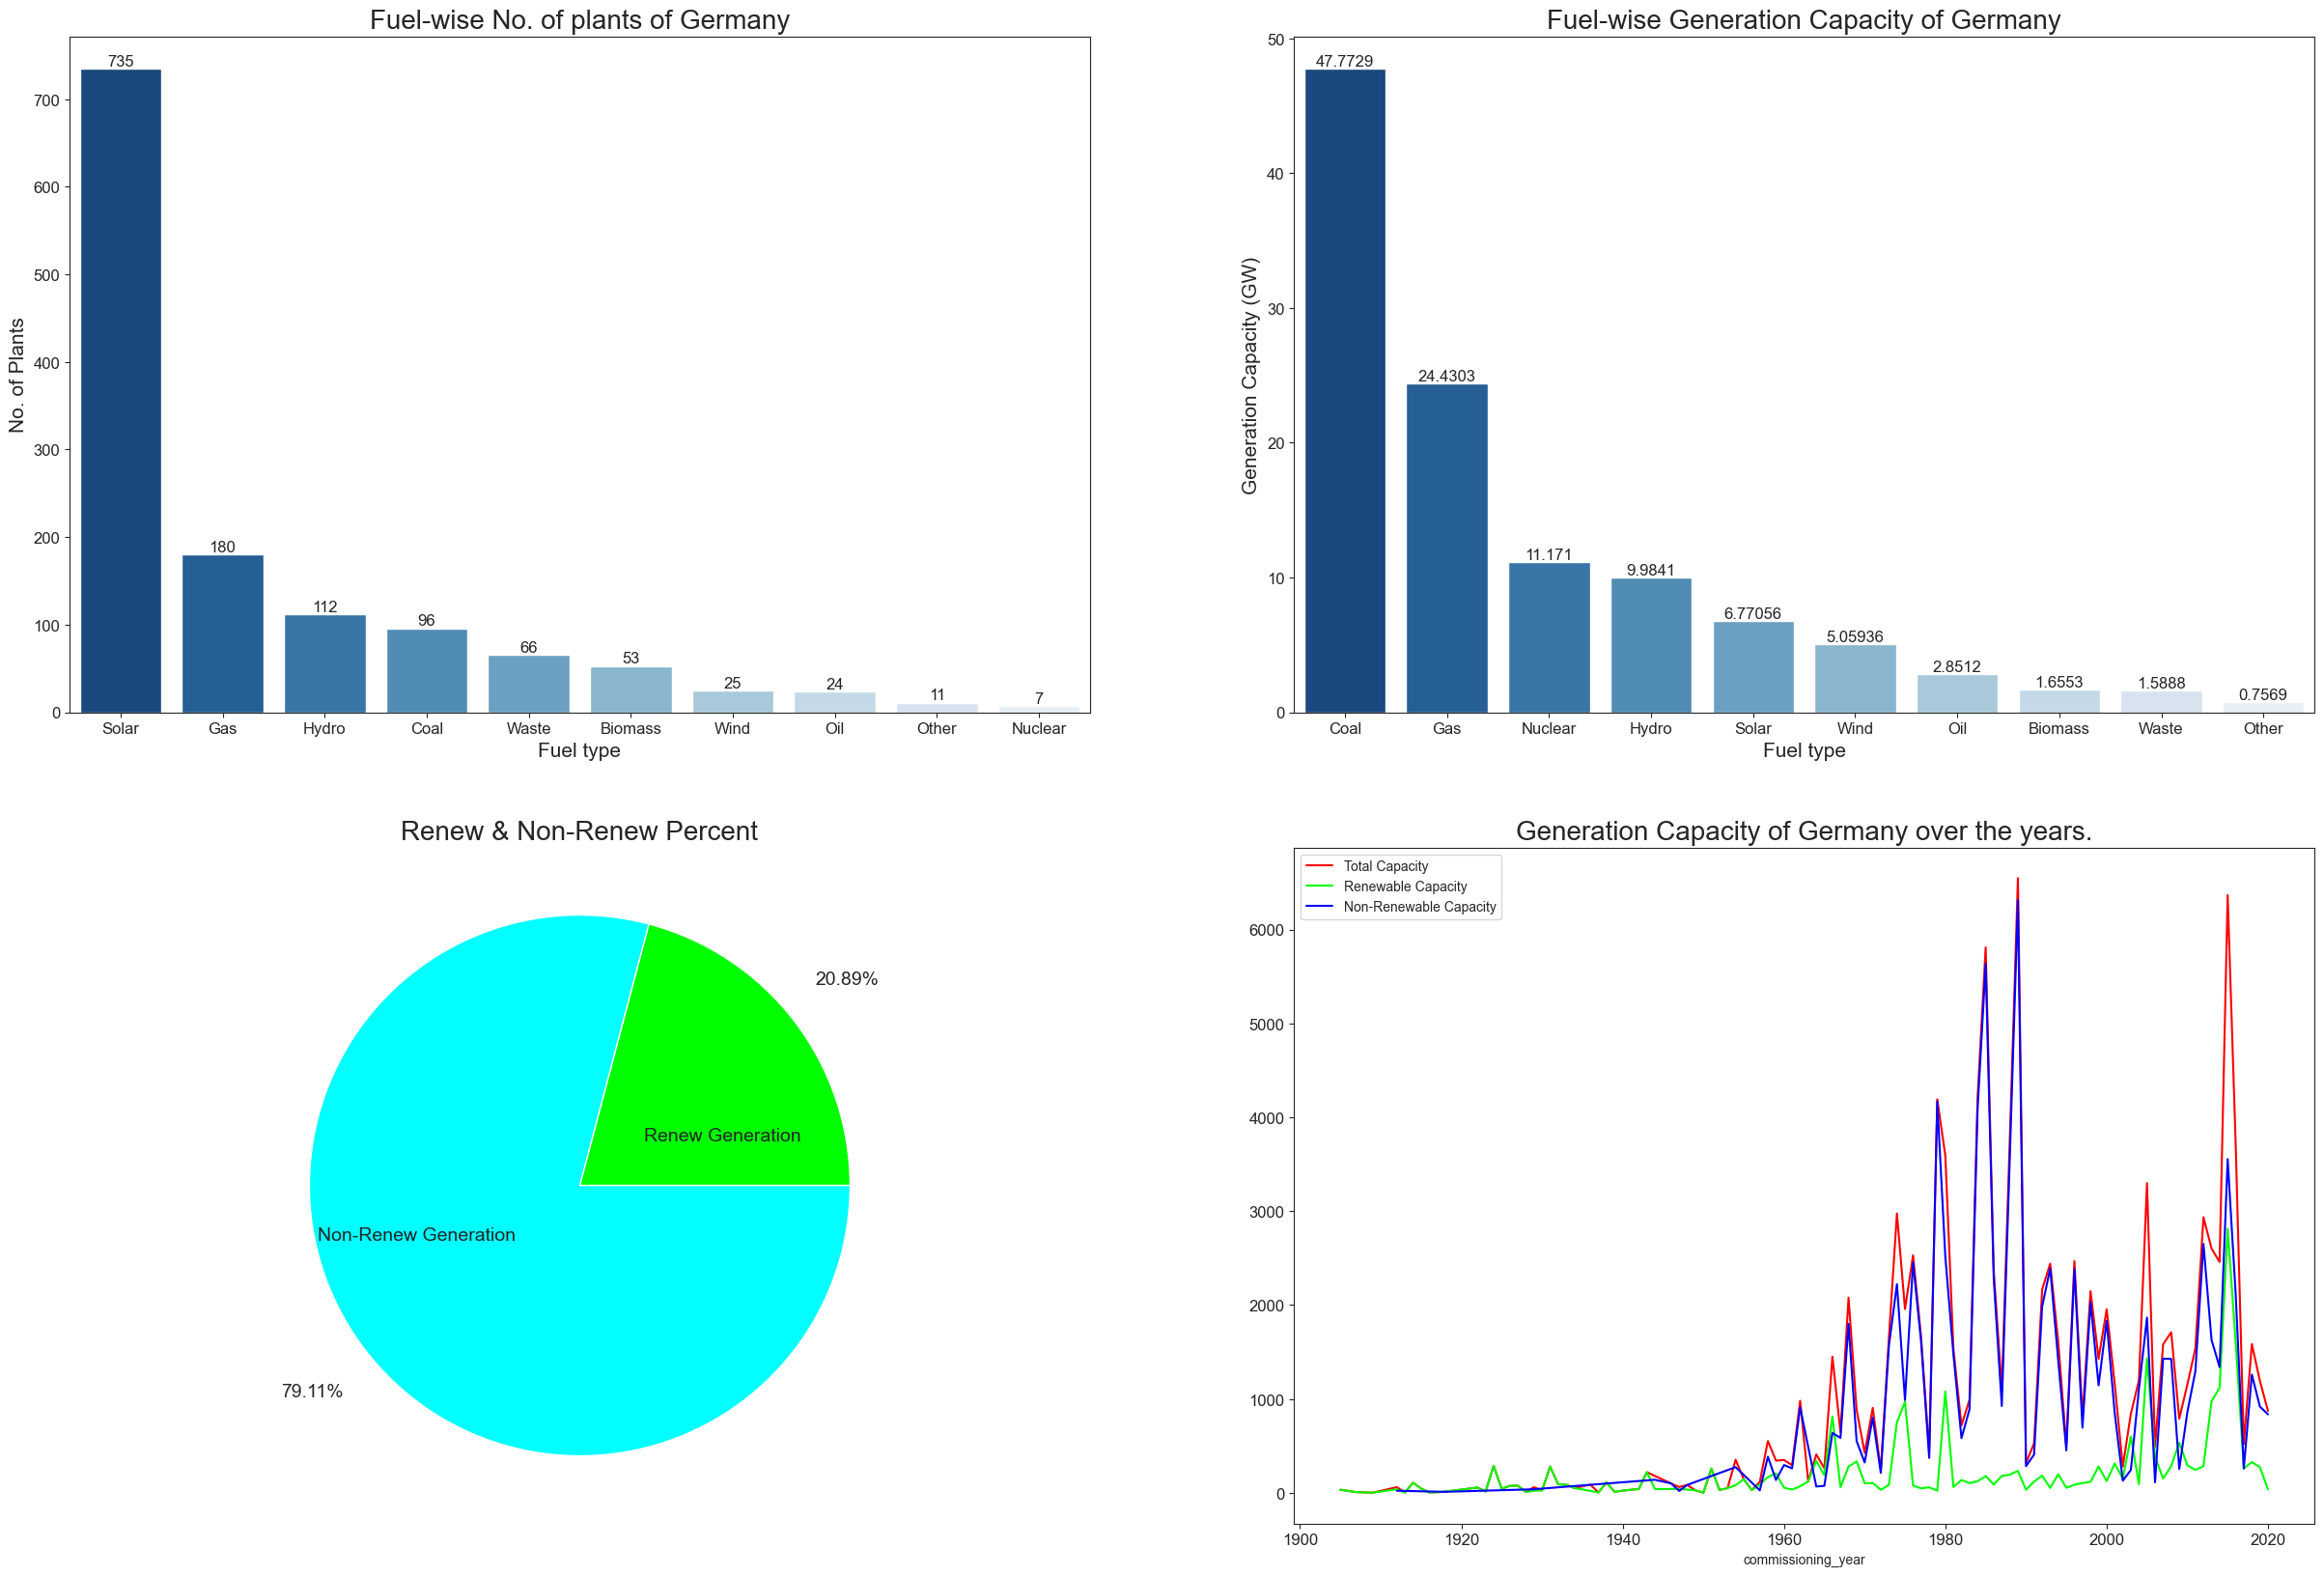

In [80]:
import folium 

plt.figure(figsize = (30, 20))
def country_data(country):
    # Separating the data of particular country 
    df_country = df[df['country_name'] == country]
    
    # info - 1
    No_of_plants = df_country.shape[0]
    print('Total No. of Plants = ', No_of_plants)
    
    # info - 2
    plant_type = df_country['primary_fuel'].value_counts()  #Separating Plants according to fuel type
    plt.subplot(2, 2, 1)
    ax = sns.barplot(x = plant_type.index, y = plant_type, palette = 'Blues_r')
    ax.bar_label(ax.containers[0], size = 12)
    plt.title(f'Fuel-wise No. of plants of {country}', size = 20)
    plt.xlabel('Fuel type', size = 15)
    plt.ylabel('No. of Plants', size = 15)
    plt.xticks(size = 12)
    plt.yticks(size = 12);


    
    # info - 3
    print('Total Generation Capacity = ', round((df_country['capacity_mw'].sum()/1000),2), '(GW)\n')
    
    
    # info - 4
    gen_cap = (df_country.groupby('primary_fuel')['capacity_mw'].sum()/1000).sort_values(ascending = False)
    plt.subplot(2, 2, 2)
    ax = sns.barplot(x = gen_cap.index, y = gen_cap, palette = 'Blues_r')
    ax.bar_label(ax.containers[0], size = 12)
    plt.title(f'Fuel-wise Generation Capacity of {country}', size = 20)
    plt.xlabel('Fuel type', size = 15)
    plt.ylabel('Generation Capacity (GW)', size = 15)
    plt.xticks(size = 12)
    plt.yticks(size = 12);

    
    # info - 5 
    plt.subplot(2, 2, 3)
    total_gen = df[df['country_name'] == country].capacity_mw.sum()
    renew_gen = df_renew[df_renew['country_name'] == country].capacity_mw.sum()
    non_renew_gen = df_non_renew[df_non_renew['country_name'] == country].capacity_mw.sum()
    renew_percent = (renew_gen/total_gen) * 100
    non_renew_percent = (non_renew_gen/total_gen) * 100
    pie_data = np.array([renew_percent, non_renew_percent])
    plt.pie(pie_data, autopct = '%1.2f%%', colors = ['lime', 'cyan'], labels = ['Renew Generation', 'Non-Renew Generation'], 
            textprops = {'fontsize': 14}, pctdistance = 1.25, labeldistance = .3)
    plt.title('Renew & Non-Renew Percent', size = 20);
    
    
    # info - 6
    plt.subplot(2, 2, 4)
    total_cap = df_country.groupby('commissioning_year')['capacity_mw'].sum().plot(kind = 'line', color = 'r')
    renew_cap = df_renew[df_renew['country_name'] == country].groupby('commissioning_year')['capacity_mw'].sum().plot(kind = 'line', color = 'lime')
    non_renew_cap = df_non_renew[df_non_renew['country_name'] == country].groupby('commissioning_year')['capacity_mw'].sum().plot(kind = 'line', color = 'b')
    plt.title(f'Generation Capacity of {country} over the years.', size = 20)
    plt.legend(labels = ['Total Capacity', 'Renewable Capacity', 'Non-Renewable Capacity'])
    plt.xticks(size = 12)
    plt.yticks(size = 12);
    
    
    # info - 7
    print(f'Geographical Locations of the Power plants of {country}')
    
    map = folium.Map(zoom_start=1)
    for i in range(0, len(df_country)):
        folium.Marker([df_country.iloc[i]['latitude'], df_country.iloc[i]['longitude']]).add_to(map)
    return map

country_data(input("Enter the Country Name : "))

<a id = "findings"></a>

# __Findings of the Project at a glance__


1. The Global Power Generation Capacity is about 5700 GW.
1. USA has the the most No. of power plants (9800). China has second most No. of power plants (4200).
1. China has the highest Generation Capacity (1400 GW) ; USA has the 2nd highest Generation Capacity (1200 GW)
1. Renewable fuel based plants Solar, Hydro & Wind run the most No. of plants. 
1. Coal based power plants produce the most amount of power in the world. Gas, Hydro & Nuclear are 2nd, 3rd & 4th in this list.
1. Nuclear type power plants has the most Avg. generation capacity per unit of plant(2100 MW). Solar & Wastage based plants has the least generation capacity per unit of plant (18 & 14 MW respectively).
1. Among the top 10 Power Plants with highest generation capacity, 7 are Hydro type plants which indicate the fact of huge potential power of water. 
1. USA owns the most No. of Nuclear Power Plants in the world (58). France holds the 2nd position with 19 Nuclear power plants. 
1. GLobal Percent of Renew generation =  26.92 % ; Percent of Non Renew generation =  73.08. So, Still almost three quarter of the global power generation is based on non-Renewables.
1. China generates the most amount of renewable energy, thanks to its gigantic Hydroelectric dams. USA is on the 2nd place with its huge No. of Solar, Hydro & Wind based plants.
1. Almost 96% of total power of Norway is generated from renewable sources. Almost 75% of total power of Brazil & Switzerland is generated from renewable sources. 
1. All of the top 10 years with highest new installation capacity, is in 21st Century; due to the invention of new generation technologies, ease of gathering materials to establish newer and newer plants etc.
1. With the available data, The average generation efficiency per year is about 30%.


<a id = "future-work"></a>

# __Future Scope of Work__ 

- The Analysis of this project can be updated with the updation of the raw dataset. 
- In Future, the project can be broadened to :
    - assess the relationship between __Generation Capacity__ & __GDP of countries__. 
    - assess the relationship between __Global non-Renewable Generation__ & __Global $CO_{2}$ Emission__.  